In [1]:
#imports del notebook anterior
import re
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import csv
import requests

#imports para graficar
import matplotlib.pyplot as plt
import seaborn as sns

#importando librería propia
import sys
sys.path.append('./../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.algorithms import eda as eda_eq

In [2]:
# para leer el archivo como local
agua = pd.read_csv('../data/consumo-agua.csv')

# para leer el archivo de la liga
#CSV_URL = 'https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#agua_liga = pd.read_csv(CSV_URL)

* Una grafica de correlaciones
* histogramas (poniendo distribucion)
* análisis plot por delegación
* graficar los 3 tipos de consumo (suma y/o conteo)
* imprimir cantidad de datos faltantes
* buscar diferencias en variables con respecto a indice_des --Scatterplots


- ¿Se consume la misma cantidad de agua en cada uno de los indices?
- La localidad / colonia/ delegación afecta en el consumo?
- los datos estaban... en que temporalidad? bimestral --> data más espaciada? --> cambios entre bimestres?




In [3]:
agua = eda_eq.prepara_dataset(agua)

In [4]:
agua.head()

geo_point  \
0  19.4552601937,-99.1126617526   
1  19.4552601937,-99.1126617526   
2  19.4557195871,-99.1135822797   
3  19.4596467168,-99.1044693641   
4  19.4741606185,-99.1467497317   

                                           geo_shape  consumo_total_mixto  \
0  {"type": "multipolygon", "coordinates": [[[[-9...               159.72   
1  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
2  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
3  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
4  {"type": "multipolygon", "coordinates": [[[[-9...                56.72   

   anio             nomgeo  consumo_prom_dom  consumo_total_dom  \
0  2019  gustavo a. madero         42.566364             468.23   
1  2019  gustavo a. madero         35.936667             107.81   
2  2019  gustavo a. madero         24.586000             122.93   
3  2019  gustavo a. madero          0.000000               0.00   
4  2019       azcapotzalco         67.436250             539.49   

            alcaldia             colonia  consumo_prom_mixto  consumo_total  \
0  gustavo a. madero      7 de noviembre               53.24         631.00   
1  gustavo a. madero      7 de noviembre                0.00         115.13   
2  gustavo a. madero      7 de noviembre                0.00         197.96   
3  gustavo a. madero  nueva tenochtitlan                0.00         253.53   
4       azcapotzalco            prohogar               56.72         839.35   

   consumo_prom  consumo_prom_no_dom bimestre  consumo_total_no_dom    gid  \
0     42.066667                 3.05        3                  3.05  57250   
1     28.782500                 7.32        3                  7.32  57253   
2     32.993333                75.03        3                 75.03  57255   
3     84.510000                84.51        3                253.53  57267   
4     76.304545               121.57        3                243.14  57330   

  indice_des    latitud   longitud  
0       alto  19.455260 -99.112662  
1      medio  19.455260 -99.112662  
2    popular  19.455720 -99.113582  
3       bajo  19.459647 -99.104469  
4       bajo  19.474161 -99.146750

In [5]:
# analizando correlaciones
corr = agua.corr()
corr

consumo_total_mixto  anio  consumo_prom_dom  \
consumo_total_mixto              1.000000   NaN          0.042414   
anio                                  NaN   NaN               NaN   
consumo_prom_dom                 0.042414   NaN          1.000000   
consumo_total_dom                0.095245   NaN          0.039057   
consumo_prom_mixto               0.747912   NaN          0.034427   
consumo_total                    0.179980   NaN          0.086303   
consumo_prom                    -0.015296   NaN          0.082282   
consumo_prom_no_dom             -0.029513   NaN          0.106284   
consumo_total_no_dom             0.024932   NaN          0.095580   
latitud                          0.158316   NaN          0.038515   
longitud                        -0.090781   NaN         -0.084826   

                      consumo_total_dom  consumo_prom_mixto  consumo_total  \
consumo_total_mixto            0.095245            0.747912       0.179980   
anio                                NaN                 NaN            NaN   
consumo_prom_dom               0.039057            0.034427       0.086303   
consumo_total_dom              1.000000            0.059390       0.829515   
consumo_prom_mixto             0.059390            1.000000       0.155880   
consumo_total                  0.829515            0.155880       1.000000   
consumo_prom                  -0.024583            0.002969       0.399393   
consumo_prom_no_dom           -0.008457           -0.008359       0.428152   
consumo_total_no_dom           0.067818            0.074109       0.640387   
latitud                        0.065557            0.083842       0.083843   
longitud                      -0.133556           -0.094724      -0.160327   

                      consumo_prom  consumo_prom_no_dom  consumo_total_no_dom  \
consumo_total_mixto      -0.015296            -0.029513              0.024932   
anio                           NaN                  NaN                   NaN   
consumo_prom_dom          0.082282             0.106284              0.095580   
consumo_total_dom        -0.024583            -0.008457              0.067818   
consumo_prom_mixto        0.002969            -0.008359              0.074109   
consumo_total             0.399393             0.428152              0.640387   
consumo_prom              1.000000             0.984467              0.705045   
consumo_prom_no_dom       0.984467             1.000000              0.737402   
consumo_total_no_dom      0.705045             0.737402              1.000000   
latitud                   0.005914             0.000485              0.024435   
longitud                 -0.026862            -0.039022             -0.086867   

                       latitud  longitud  
consumo_total_mixto   0.158316 -0.090781  
anio                       NaN       NaN  
consumo_prom_dom      0.038515 -0.084826  
consumo_total_dom     0.065557 -0.133556  
consumo_prom_mixto    0.083842 -0.094724  
consumo_total         0.083843 -0.160327  
consumo_prom          0.005914 -0.026862  
consumo_prom_no_dom   0.000485 -0.039022  
consumo_total_no_dom  0.024435 -0.086867  
latitud               1.000000 -0.174334  
longitud             -0.174334  1.000000

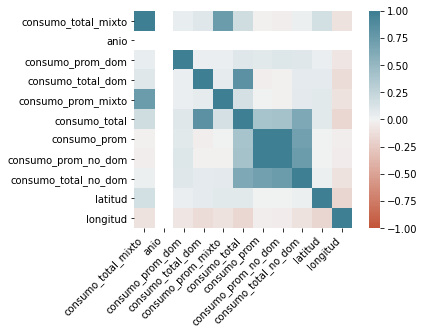

In [6]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

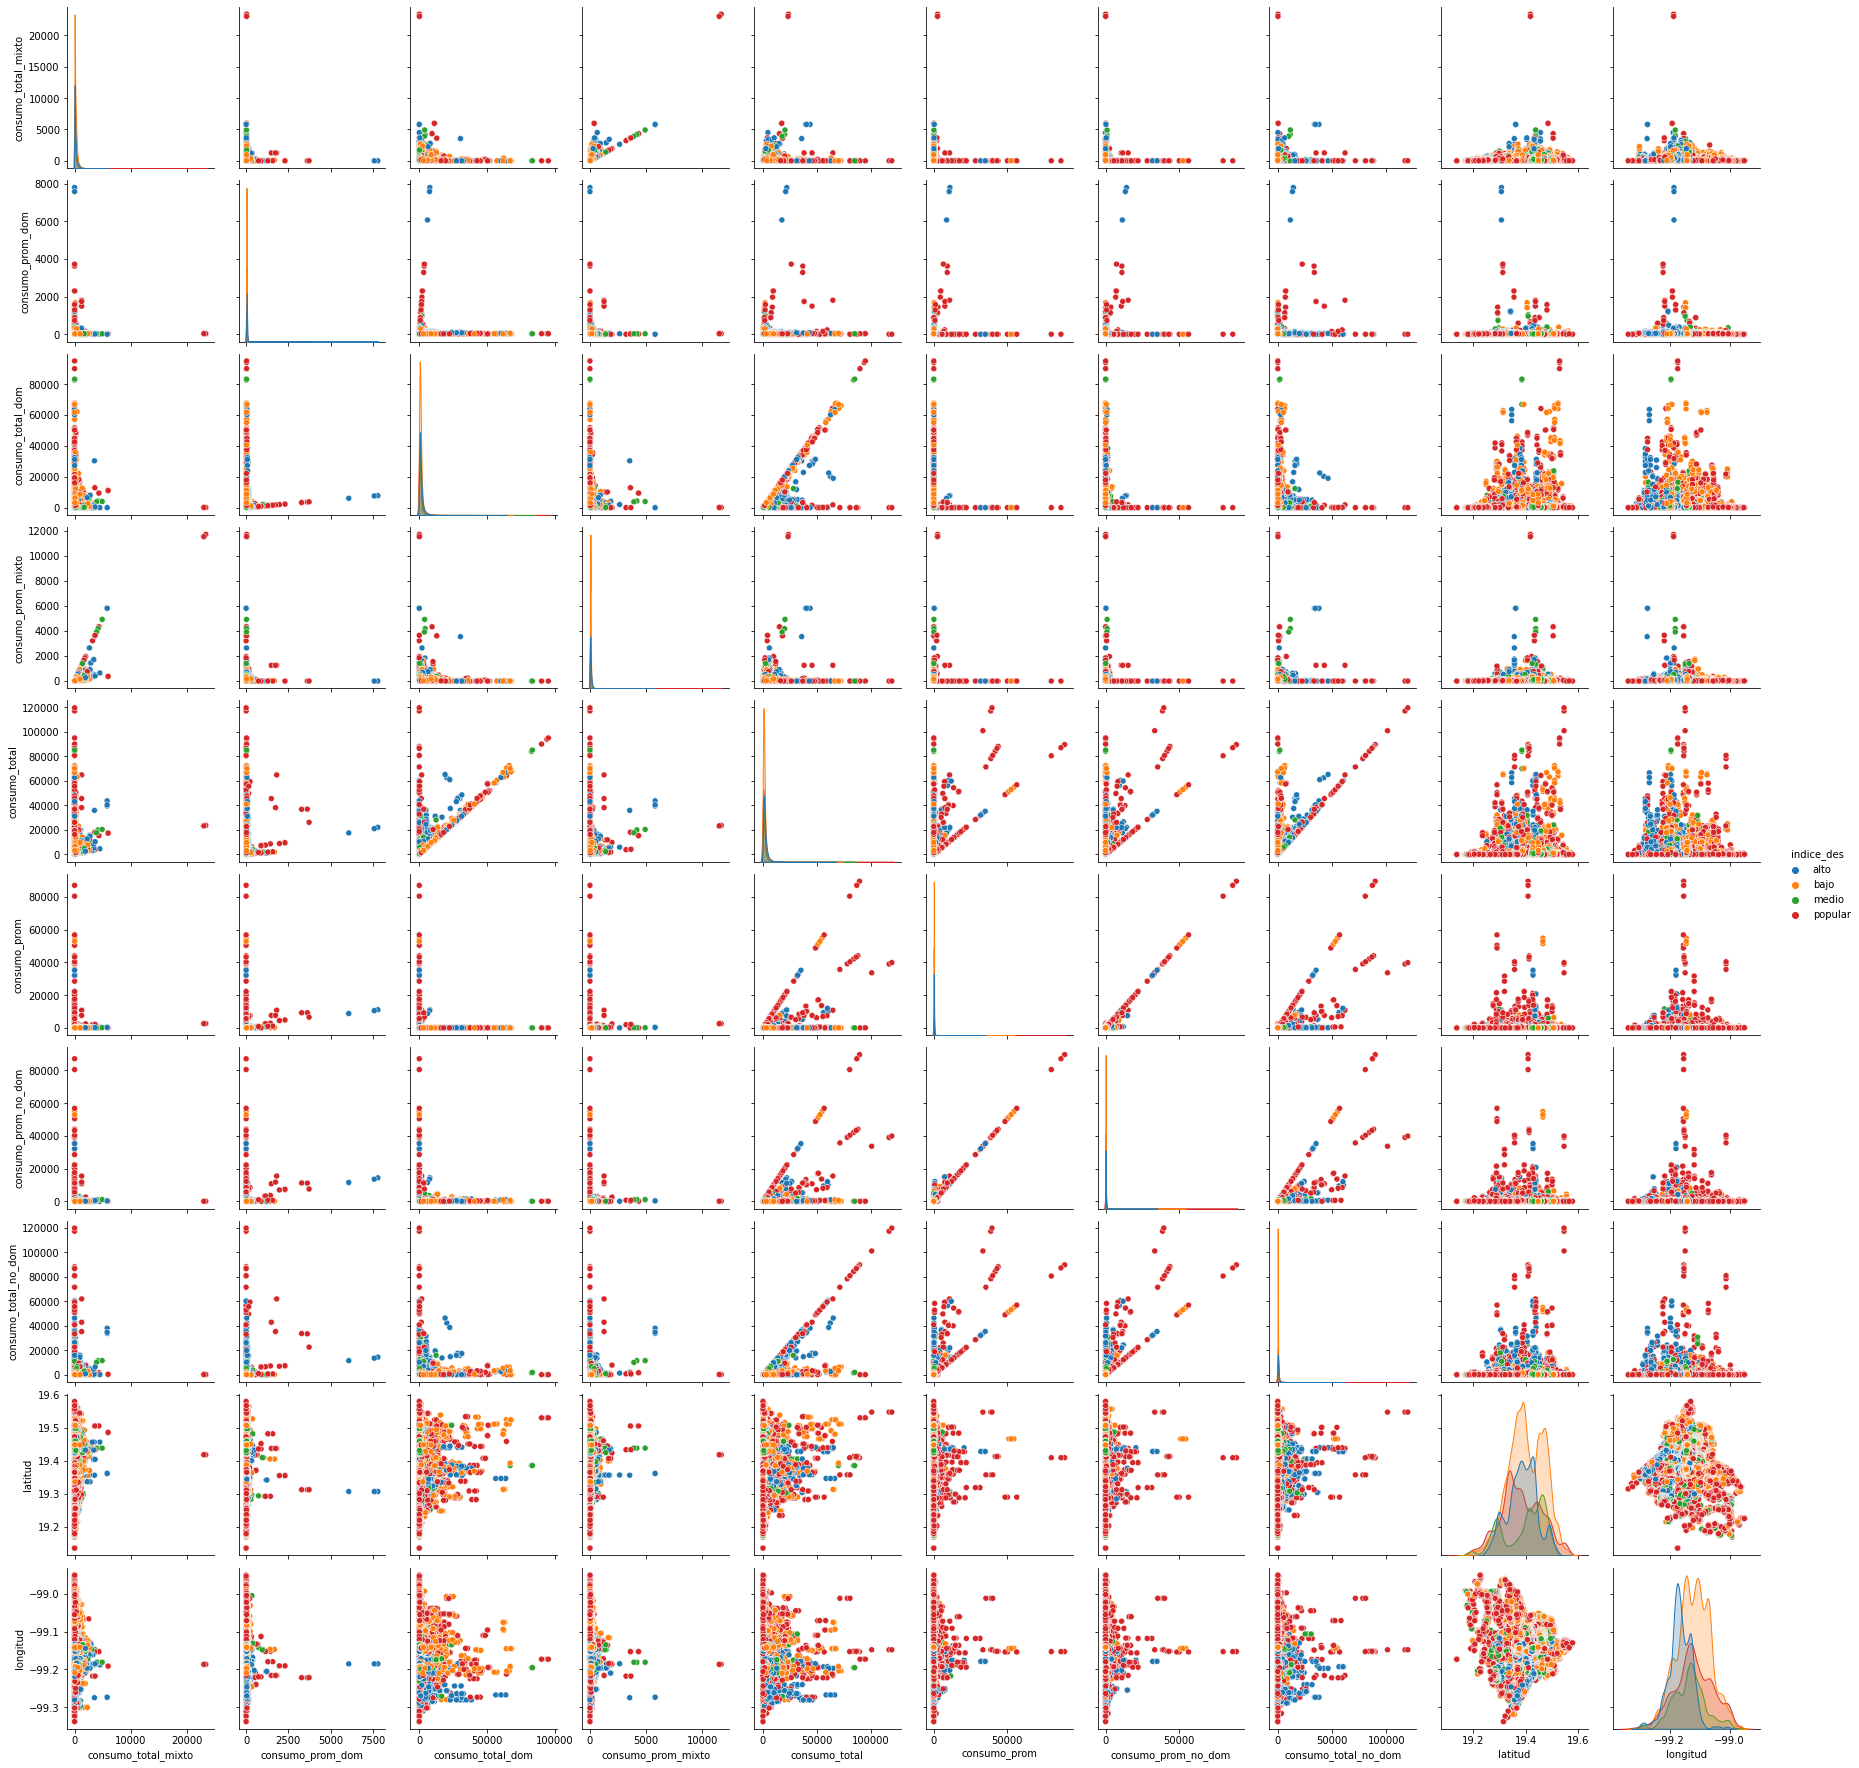

In [7]:
agua.drop(columns =["anio"], inplace = True) 
sns.pairplot(agua, hue='indice_des')

In [8]:
#sns.pairplot(agua)

In [9]:
agua.dtypes

geo_point                 object
geo_shape                 object
consumo_total_mixto      float64
nomgeo                  category
consumo_prom_dom         float64
consumo_total_dom        float64
alcaldia                category
colonia                 category
consumo_prom_mixto       float64
consumo_total            float64
consumo_prom             float64
consumo_prom_no_dom      float64
bimestre                category
consumo_total_no_dom     float64
gid                     category
indice_des              category
latitud                  float64
longitud                 float64
dtype: object

## Dividimos el dataset por bimestre

In [10]:
agua_1bim = agua.loc[agua["bimestre"] == 1]
agua_2bim = agua.loc[agua["bimestre"] == 2]
agua_3bim = agua.loc[agua["bimestre"] == 3]

In [11]:
#agua_1bim.head()

In [12]:
#agua_2bim.head()

In [13]:
#agua_3bim.head()

## Variable consumo total mixto

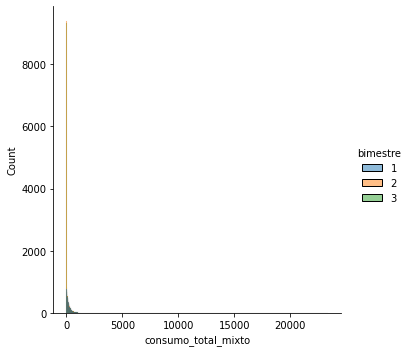

In [14]:
sns.displot(agua, x="consumo_total_mixto", hue='bimestre')

(0.0, 2000.0)

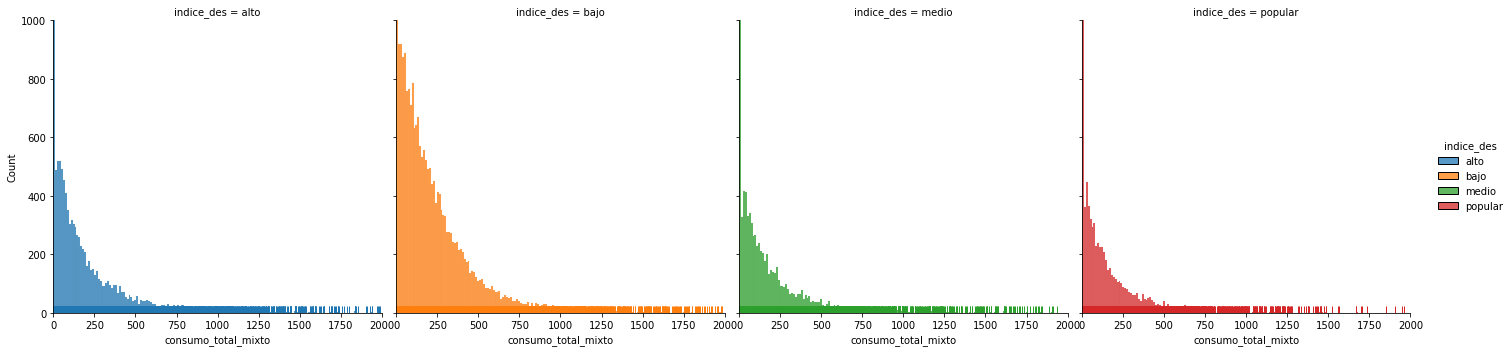

In [15]:
sns.displot(data=agua,x='consumo_total_mixto',hue='indice_des',col='indice_des', rug=True)
plt.ylim(0,1000)
plt.xlim(0,2000)

(0.0, 1000.0)

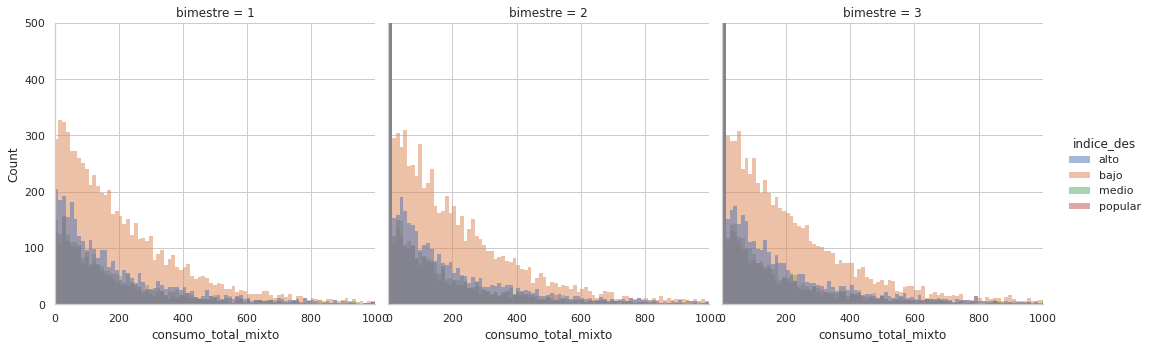

In [122]:
sns.displot(data=agua,x='consumo_total_mixto',hue='indice_des',col='bimestre')
plt.ylim(0,500)
plt.xlim(0,1000)

In [123]:
consumo_total_mixto_sinceros = agua.loc[agua["consumo_total_mixto"] > 4]
consumo_total_mixto_sinceros = agua.loc[agua["consumo_total_mixto"] < 900]

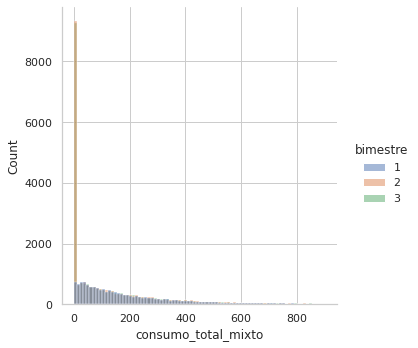

In [124]:
sns.displot(consumo_total_mixto_sinceros, x="consumo_total_mixto", hue='bimestre')

In [125]:
agua['consumo_total_mixto'].max()

23404.44

In [126]:
agua['consumo_total_mixto'].min()

0.0

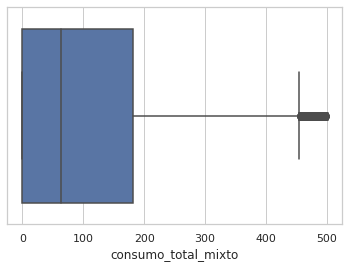

In [127]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

In [128]:
#sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

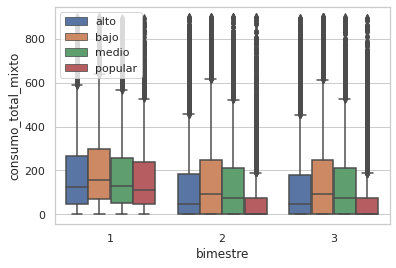

In [139]:
sns.boxplot(x="bimestre", y="consumo_total_mixto",hue="indice_des", data = consumo_total_mixto_sinceros, orient='v')
plt.legend(loc='upper left')

In [24]:
agua_por_consumo = agua.sort_values('consumo_total_mixto', ascending = False).head()

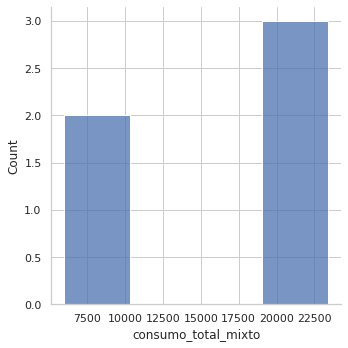

In [25]:
sns.displot(agua_por_consumo, x="consumo_total_mixto")

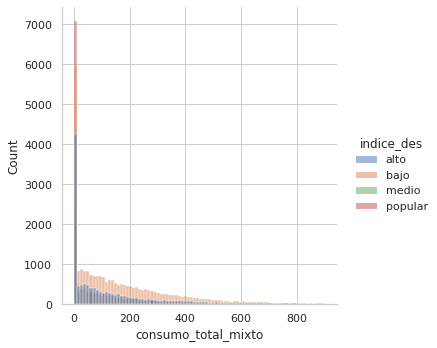

In [26]:
sns.displot(consumo_total_mixto_sinceros, x="consumo_total_mixto", hue='indice_des')

* Analizar ceros
* crear variable categórica de tipo de domicilio
* analizar boxplots sin ceros y sin outliers (el más alto)
* analizar por bimestre
* analizar por nueva variable
* buscar una variable que ayude a separar el tipo de indice_des
al final, si da tiempo:
* ver si la suma de los bimestres ayuda en algo, como una variable de totales
* heatmap con datos del geo_shape/ por bimestre

In [27]:
agua_no_popular = agua.loc[agua["indice_des"] != 'popular']

In [28]:
agua_no_popular.head()

geo_point  \
0  19.4552601937,-99.1126617526   
1  19.4552601937,-99.1126617526   
3  19.4596467168,-99.1044693641   
4  19.4741606185,-99.1467497317   
5  19.4786132637,-99.1505710391   

                                           geo_shape  consumo_total_mixto  \
0  {"type": "multipolygon", "coordinates": [[[[-9...               159.72   
1  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
3  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
4  {"type": "multipolygon", "coordinates": [[[[-9...                56.72   
5  {"type": "multipolygon", "coordinates": [[[[-9...               439.77   

              nomgeo  consumo_prom_dom  consumo_total_dom           alcaldia  \
0  gustavo a. madero         42.566364             468.23  gustavo a. madero   
1  gustavo a. madero         35.936667             107.81  gustavo a. madero   
3  gustavo a. madero          0.000000               0.00  gustavo a. madero   
4       azcapotzalco         67.436250             539.49       azcapotzalco   
5       azcapotzalco         35.675769             927.57       azcapotzalco   

                   colonia  consumo_prom_mixto  consumo_total  consumo_prom  \
0           7 de noviembre            53.24000         631.00     42.066667   
1           7 de noviembre             0.00000         115.13     28.782500   
3       nueva tenochtitlan             0.00000         253.53     84.510000   
4                 prohogar            56.72000         839.35     76.304545   
5  trabajadores del hierro            54.97125        1399.67     37.828919   

   consumo_prom_no_dom bimestre  consumo_total_no_dom    gid indice_des  \
0             3.050000        3                  3.05  57250       alto   
1             7.320000        3                  7.32  57253      medio   
3            84.510000        3                253.53  57267       bajo   
4           121.570000        3                243.14  57330       bajo   
5            10.776667        3                 32.33  57273       bajo   

     latitud   longitud  
0  19.455260 -99.112662  
1  19.455260 -99.112662  
3  19.459647 -99.104469  
4  19.474161 -99.146750  
5  19.478613 -99.150571

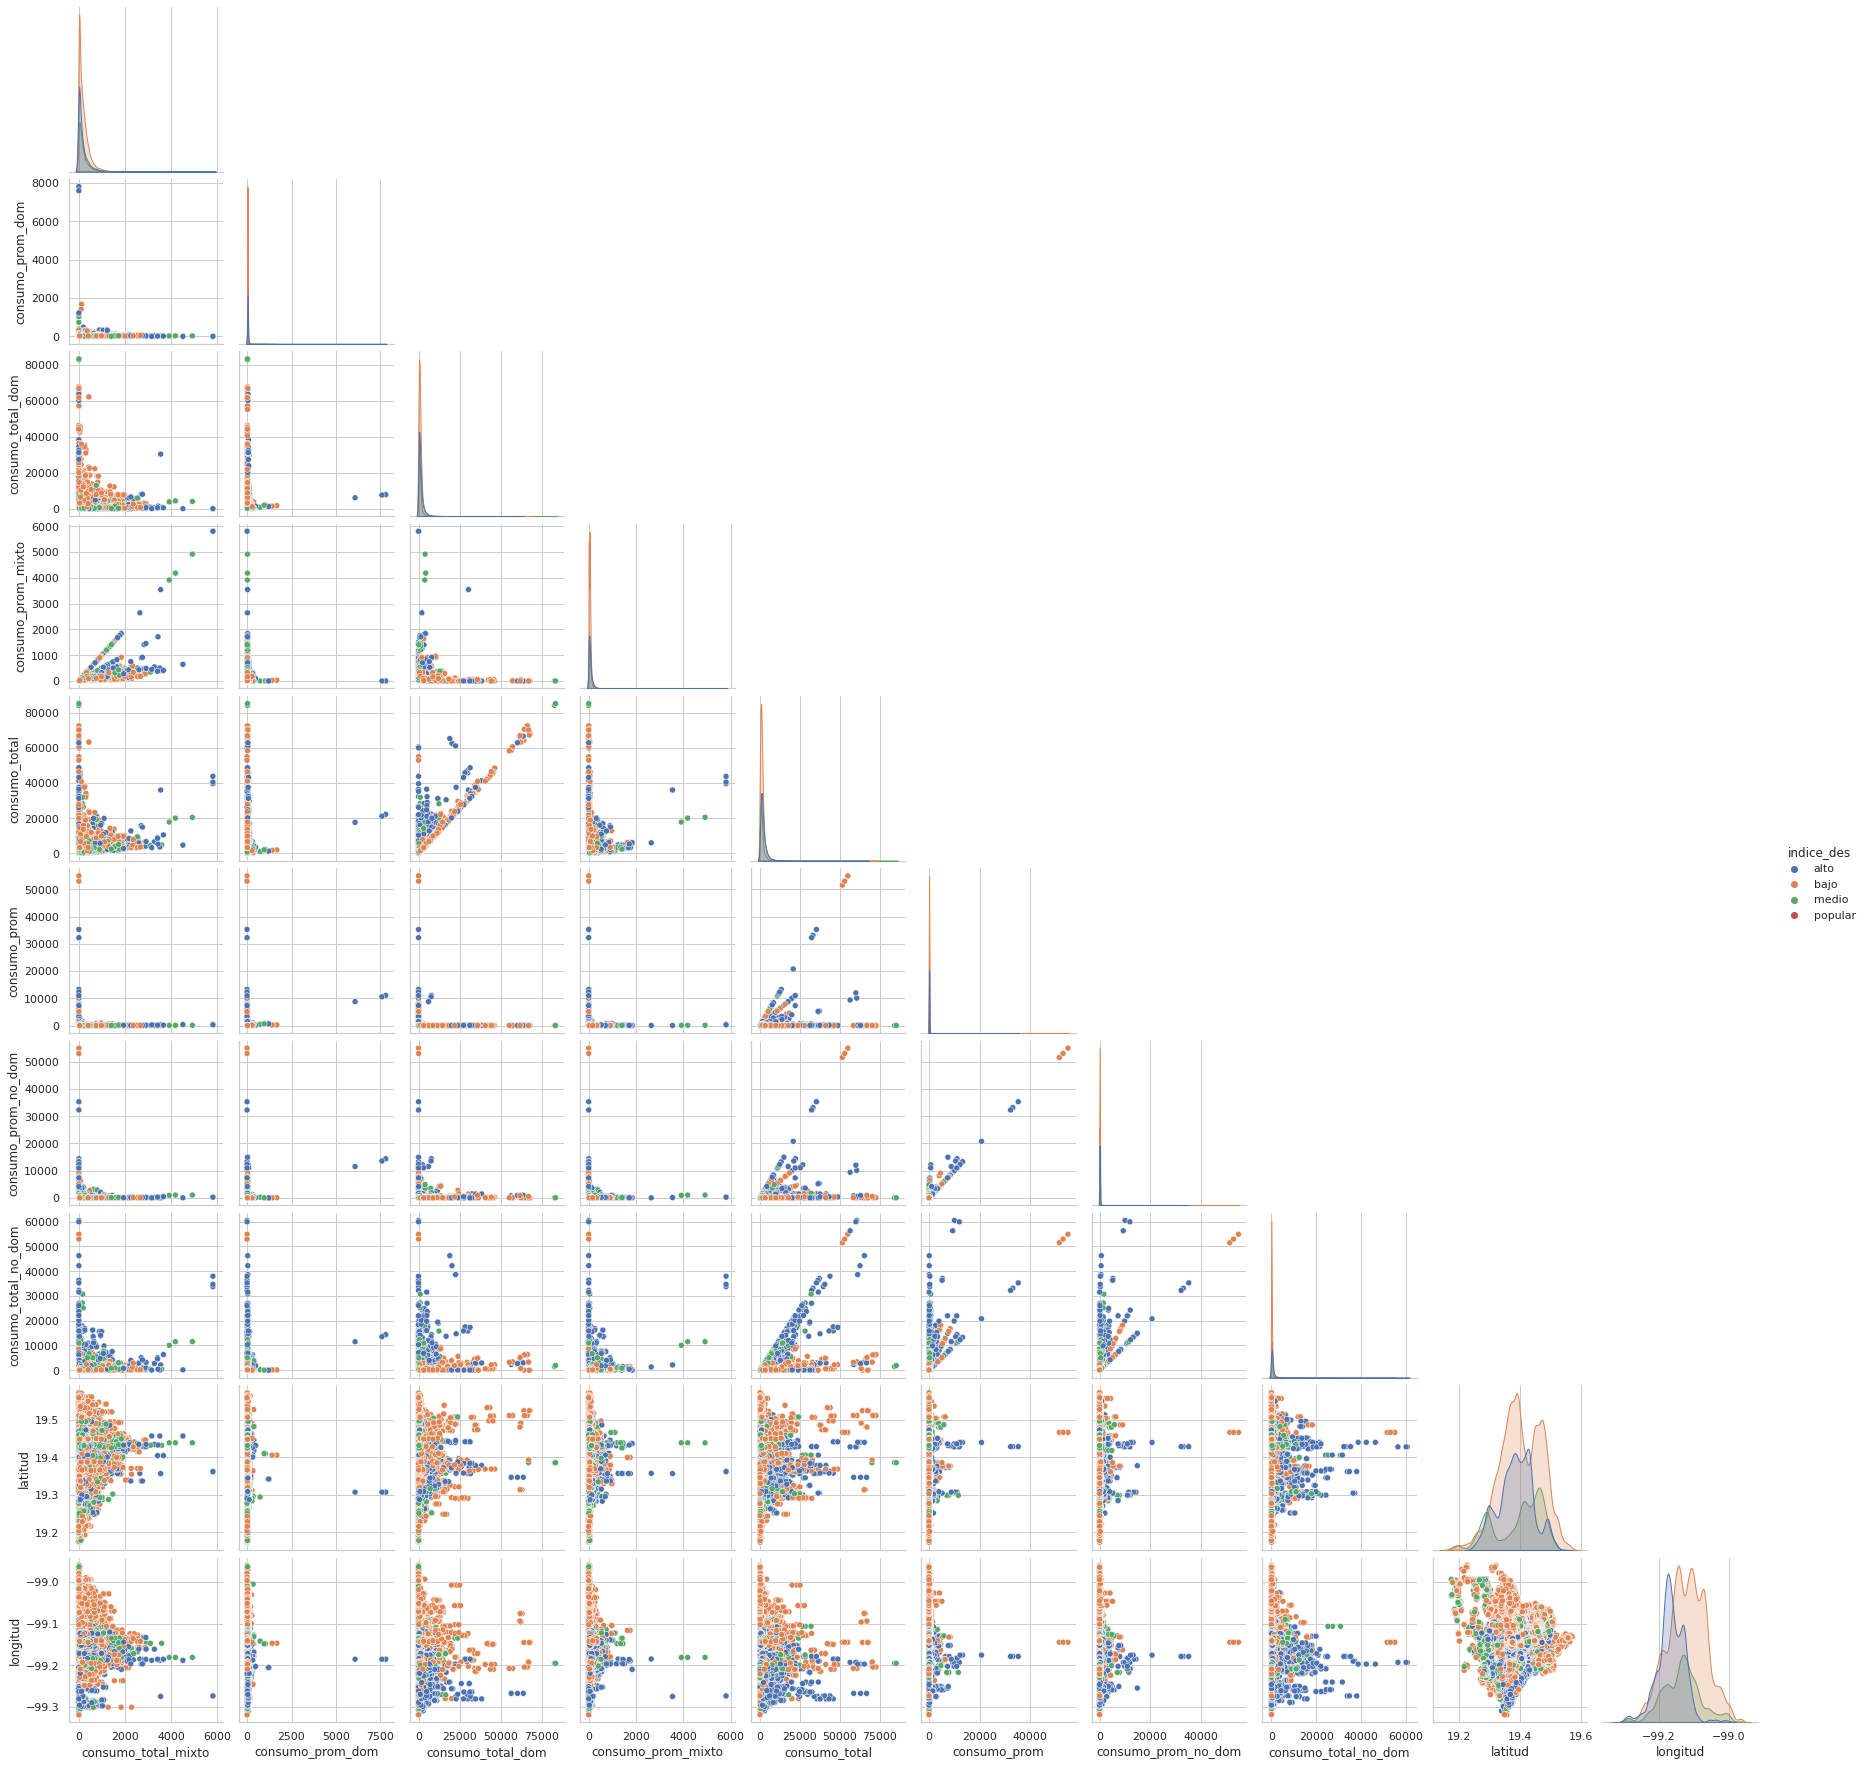

In [29]:
sns.pairplot(agua_no_popular, hue='indice_des',corner=True)

Pueden servir:
* consumo_total_dom
* consumo_total_no_dom
* consumo_total
* consumo_total_mixto

In [30]:
agua_no_popular_ni_media = agua_no_popular.loc[agua_no_popular["indice_des"] != 'medio']

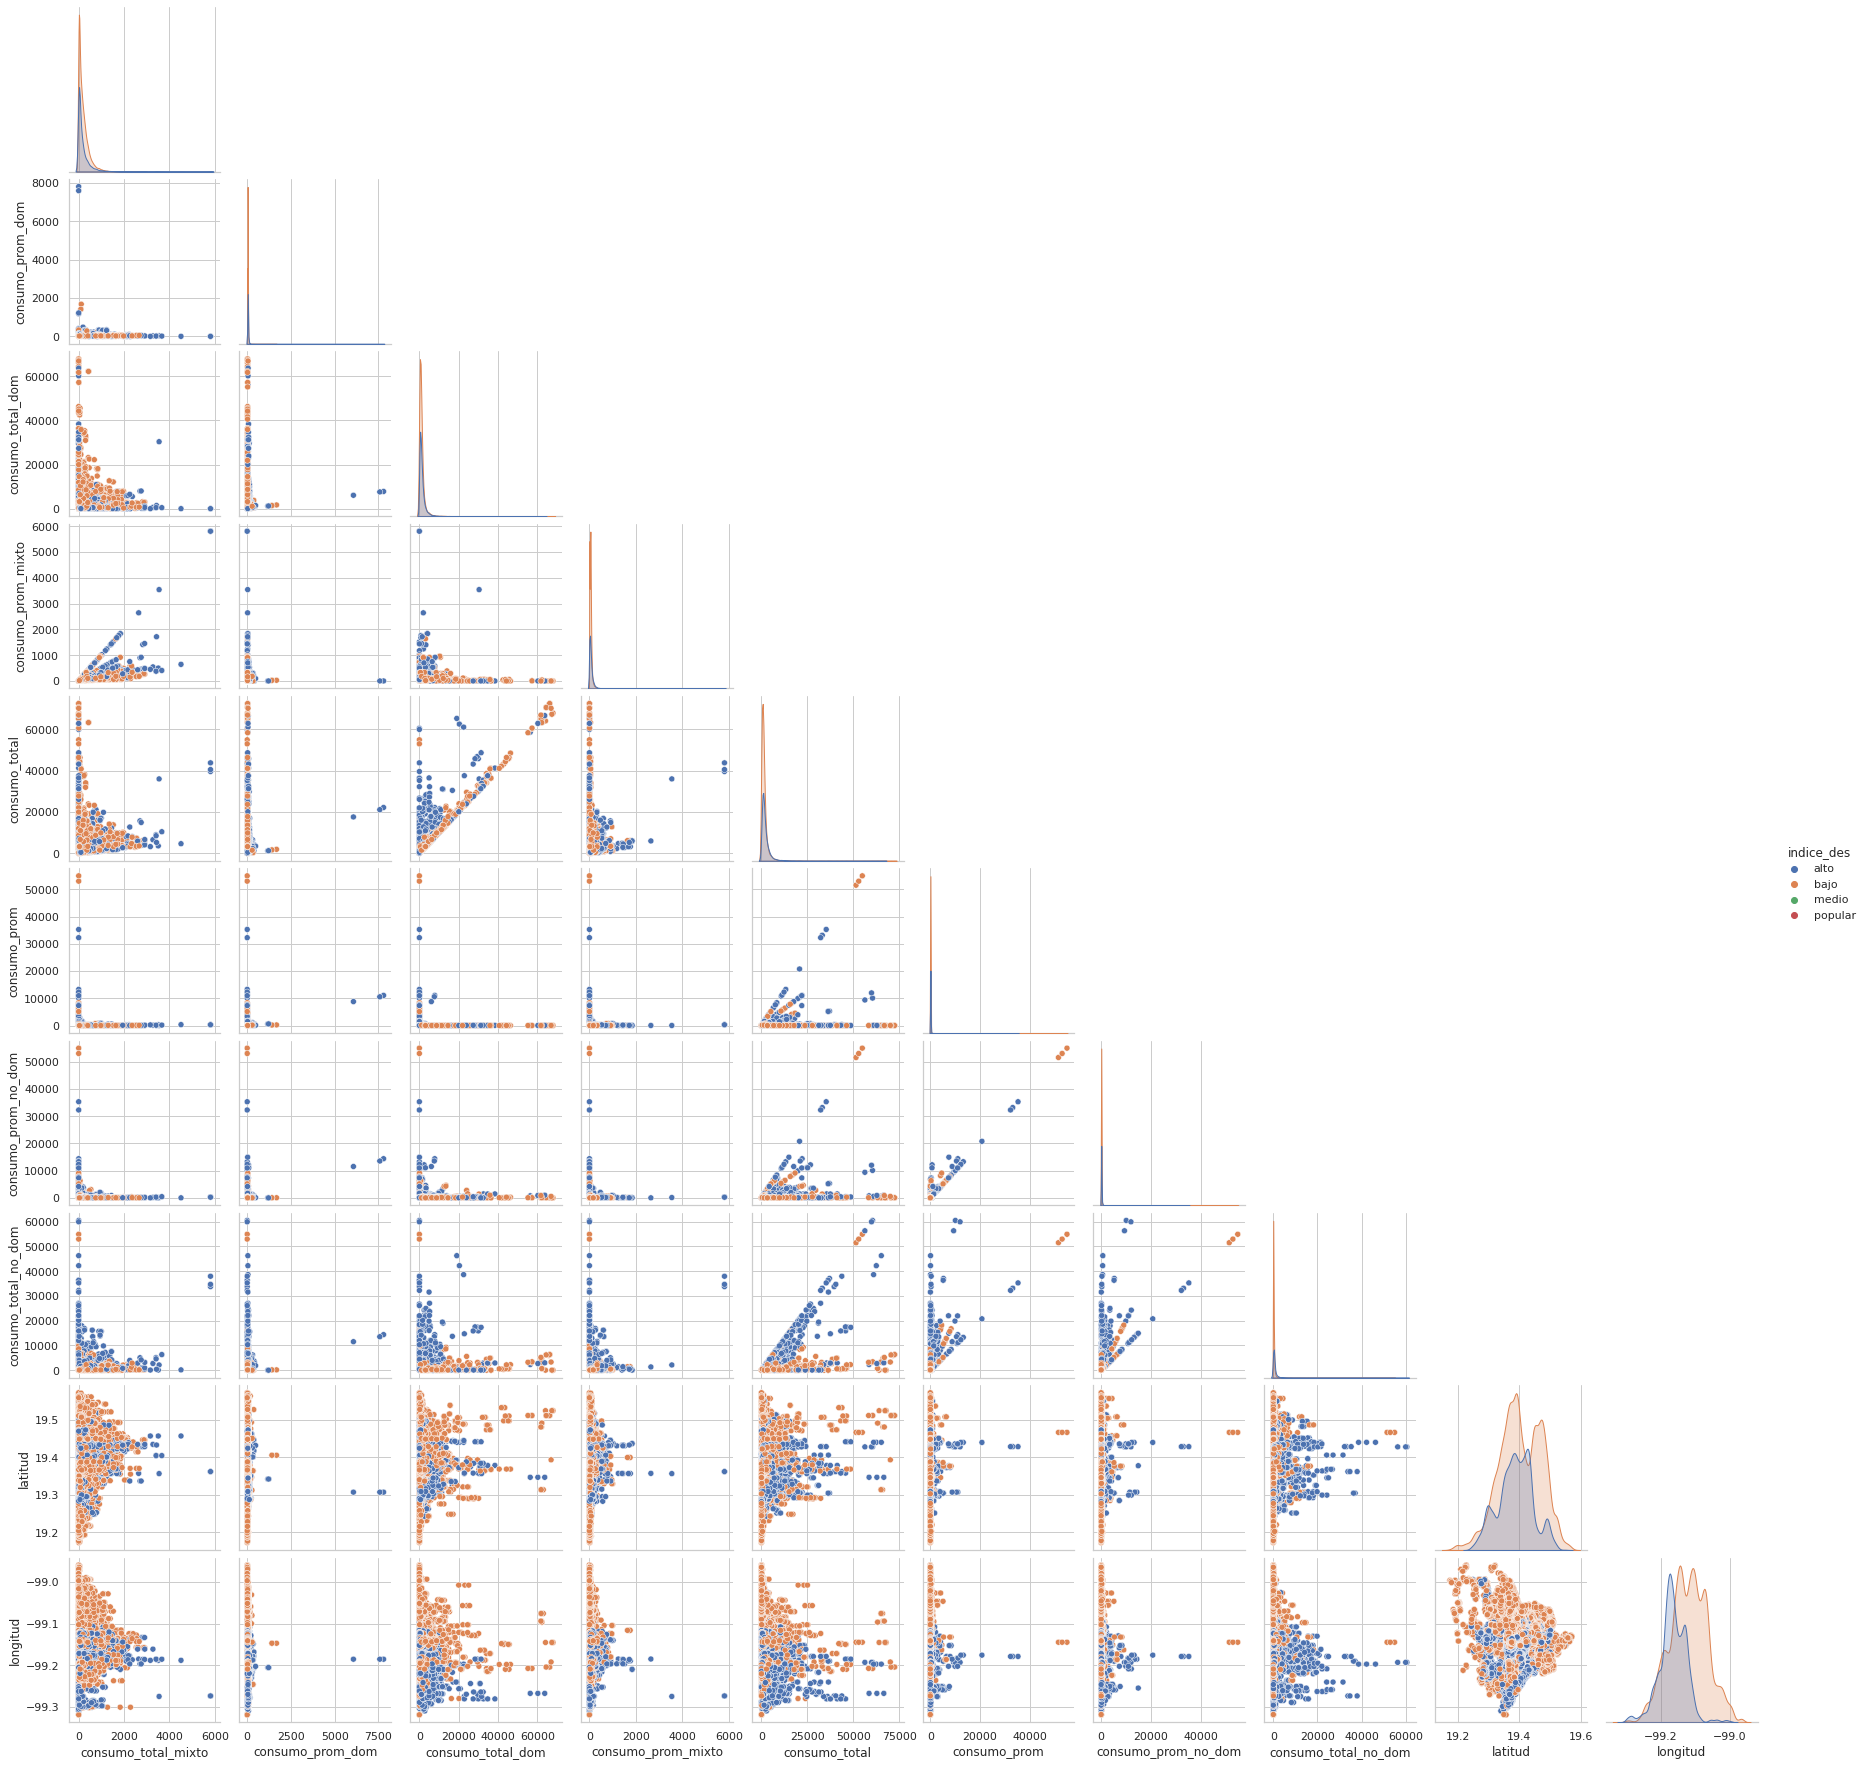

In [31]:
sns.pairplot(agua_no_popular_ni_media, hue='indice_des',corner=True)

In [32]:
agua_no_popular_ni_bajo = agua_no_popular.loc[agua_no_popular["indice_des"] != 'bajo']

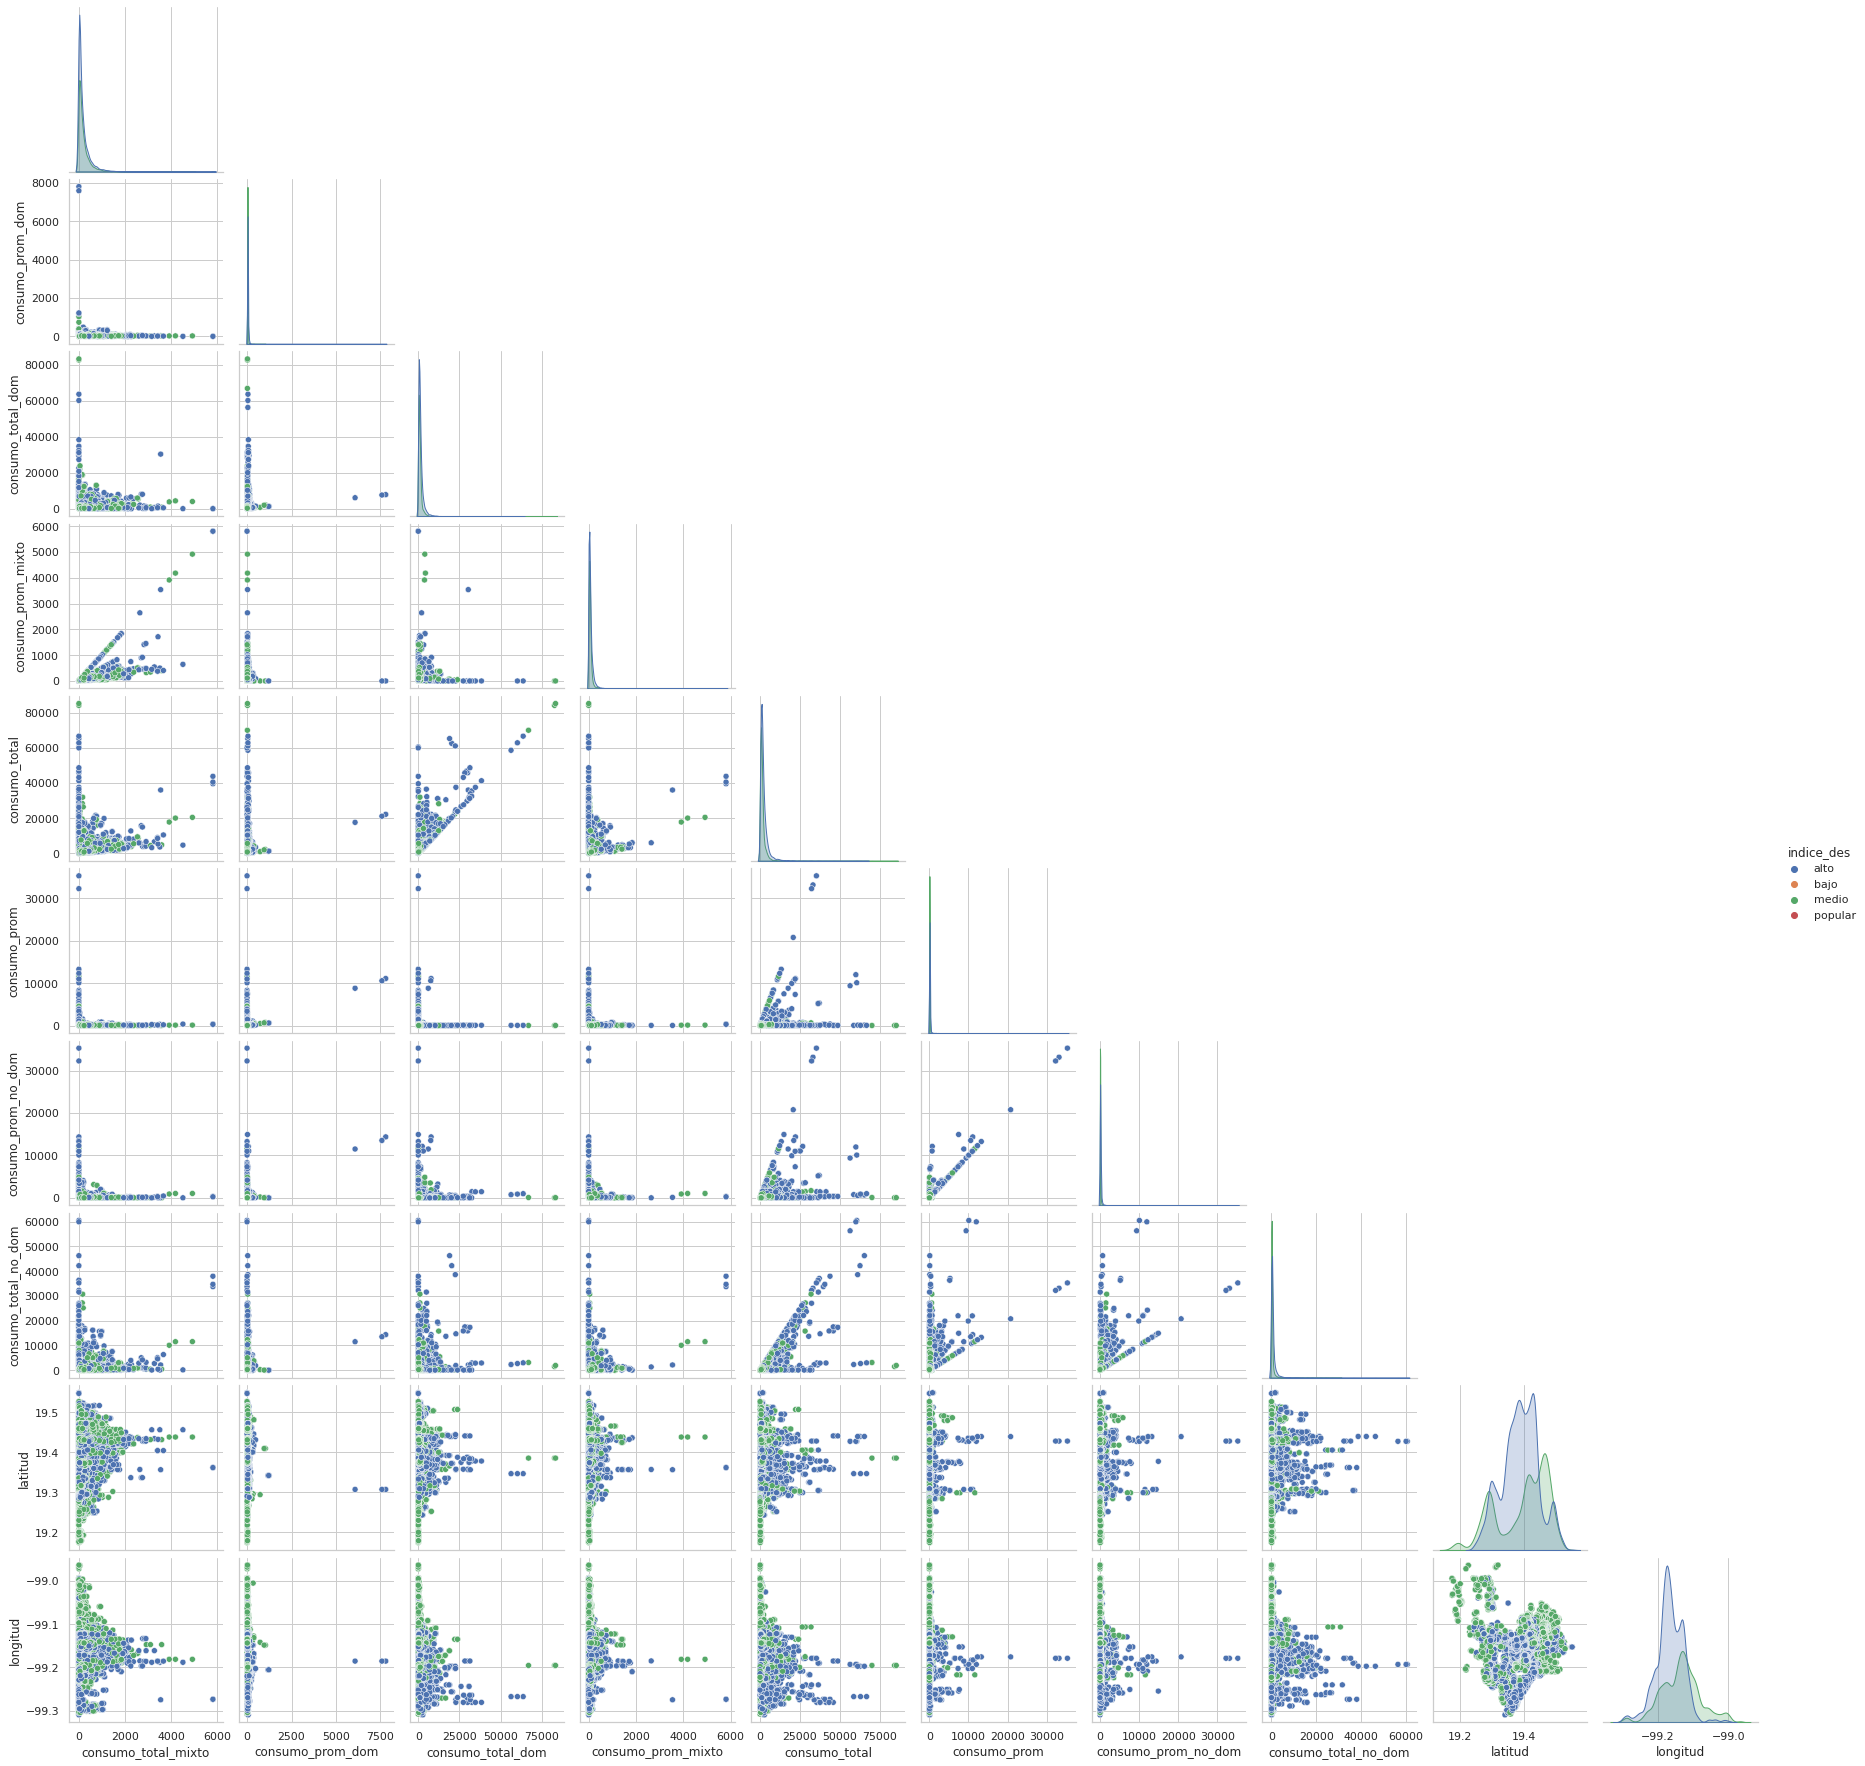

In [33]:
sns.pairplot(agua_no_popular_ni_bajo, hue='indice_des',corner=True)

In [34]:
agua.sample(20)

geo_point  \
41719  19.3845465173,-99.1277488905   
41498  19.4228322615,-99.0881666406   
69670  19.3455533453,-99.0692904542   
30824  19.3497146937,-99.1515699532   
64486  19.2909797346,-99.1319292735   
35306  19.4393187335,-99.1784582406   
61262  19.4464233213,-99.1111415501   
39403  19.3760414588,-99.1795938513   
9075   19.2512006926,-99.0587883002   
32655  19.5425004558,-99.1478866237   
63656  19.4650749997,-99.1182833159   
19990  19.4600774144,-99.0997368541   
49697  19.2782094376,-99.1420569423   
44956  19.4800673796,-99.1442019984   
7038   19.1850694489,-99.0714958971   
26522  19.3319580146,-99.1586429301   
24590  19.3130907826,-99.1529958385   
67183  19.3306776532,-99.0143101627   
24001  19.3469850956,-99.1751128247   
44381   19.293864161,-99.0055303811   

                                               geo_shape  consumo_total_mixto  \
41719  {"type": "multipolygon", "coordinates": [[[[-9...                17.76   
41498  {"type": "multipolygon", "coordinates": [[[[-9...               144.40   
69670  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
30824  {"type": "multipolygon", "coordinates": [[[[-9...               182.36   
64486  {"type": "multipolygon", "coordinates": [[[[-9...                68.32   
35306  {"type": "multipolygon", "coordinates": [[[[-9...                  NaN   
61262  {"type": "multipolygon", "coordinates": [[[[-9...               553.13   
39403  {"type": "multipolygon", "coordinates": [[[[-9...              1056.17   
9075   {"type": "multipolygon", "coordinates": [[[[-9...               135.95   
32655  {"type": "multipolygon", "coordinates": [[[[-9...               447.67   
63656  {"type": "multipolygon", "coordinates": [[[[-9...                68.58   
19990  {"type": "multipolygon", "coordinates": [[[[-9...                80.53   
49697  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
44956  {"type": "multipolygon", "coordinates": [[[[-9...               189.16   
7038   {"type": "multipolygon", "coordinates": [[[[-9...                29.28   
26522  {"type": "multipolygon", "coordinates": [[[[-9...                  NaN   
24590  {"type": "multipolygon", "coordinates": [[[[-9...                  NaN   
67183  {"type": "multipolygon", "coordinates": [[[[-9...                  NaN   
24001  {"type": "multipolygon", "coordinates": [[[[-9...               190.55   
44381  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   

                    nomgeo  consumo_prom_dom  consumo_total_dom  \
41719            iztacalco         15.562440            2614.49   
41498  venustiano carranza         24.381395            1048.40   
69670           iztapalapa          0.000000               0.00   
30824             coyoacan         28.350179            3175.22   
64486              tlalpan         28.320000             141.60   
35306       miguel hidalgo         12.976667            7396.73   
61262  venustiano carranza         37.752308             490.78   
39403        benito juarez         28.206480            3525.81   
9075            xochimilco         19.845000             476.28   
32655    gustavo a. madero         34.553846             449.20   
63656    gustavo a. madero         37.280000             260.96   
19990    gustavo a. madero         34.412174             791.48   
49697              tlalpan         45.488000             682.32   
44956    gustavo a. madero         24.396667             512.33   
7038            milpa alta         32.335000              64.67   
26522             coyoacan               NaN                NaN   
24590             coyoacan               NaN                NaN   
67183           iztapalapa               NaN                NaN   
24001             coyoacan         38.728235             658.38   
44381              tlahuac         21.655000              43.31   

                  alcaldia                               colonia  \
41719            iztacalco  

In [35]:
agua_1bim.sample()

geo_point  \
25805  19.3696244775,-99.0140208814   

                                               geo_shape  consumo_total_mixto  \
25805  {"type": "multipolygon", "coordinates": [[[[-9...                 4.82   

           nomgeo  consumo_prom_dom  consumo_total_dom    alcaldia  \
25805  iztapalapa             52.42              262.1  iztapalapa   

                         colonia  consumo_prom_mixto  consumo_total  \
25805  santa martha acatitla sur                2.41         395.92   

       consumo_prom  consumo_prom_no_dom bimestre  consumo_total_no_dom  \
25805        39.592                 43.0        1                 129.0   

         gid indice_des    latitud   longitud  
25805  16237       bajo  19.369624 -99.014021

In [36]:
agua['geo_shape'][0]

'{"type": "multipolygon", "coordinates": [[[[-99.1129115375867, 19.4550653645359], [-99.1129039110575, 19.4550969865952], [-99.1128938058784, 19.4551389567115], [-99.1128729568036, 19.455225479435], [-99.1128599916513, 19.4552793145927], [-99.1128517073064, 19.4553136816831], [-99.1128304577774, 19.4554019110187], [-99.1128209627002, 19.4554413076578], [-99.1128144419768, 19.455468378739], [-99.1128112006725, 19.4554818601029], [-99.1128094465635, 19.4554891290213], [-99.1127673954752, 19.4556636643413], [-99.1126750564368, 19.4556441222319], [-99.1125829268458, 19.4556246343204], [-99.1125312646035, 19.4556137011819], [-99.1124876368116, 19.4556044681399], [-99.1123964496968, 19.4555851700534], [-99.112407114284, 19.4555414927387], [-99.1124072221566, 19.4555410509415], [-99.1124082040637, 19.4555370507861], [-99.1124088357197, 19.4555344627467], [-99.1124131803687, 19.4555166617236], [-99.1124191481111, 19.4554922363869], [-99.1124399112582, 19.4554072759451], [-99.1124610843173, 19.

In [37]:
agua_2 = agua.copy()

In [38]:
agua_2.sort_values('geo_shape', ascending = False).head()

geo_point  \
21412  19.3148443253,-99.3377034221   
69982  19.3148443253,-99.3377034221   
67377  19.3148443253,-99.3377034221   
5679   19.3285330239,-99.3279941345   
2571   19.3285330239,-99.3279941345   

                                               geo_shape  consumo_total_mixto  \
21412  {"type": "multipolygon", "coordinates": [[[[-9...                  0.0   
69982  {"type": "multipolygon", "coordinates": [[[[-9...                  0.0   
67377  {"type": "multipolygon", "coordinates": [[[[-9...                  NaN   
5679   {"type": "multipolygon", "coordinates": [[[[-9...                  NaN   
2571   {"type": "multipolygon", "coordinates": [[[[-9...                  0.0   

                      nomgeo  consumo_prom_dom  consumo_total_dom    alcaldia  \
21412  cuajimalpa de morelos               0.0                0.0  cuajimalpa   
69982  cuajimalpa de morelos               0.0                0.0  cuajimalpa   
67377  cuajimalpa de morelos               NaN                NaN  cuajimalpa   
5679   cuajimalpa de morelos               NaN                NaN  cuajimalpa   
2571   cuajimalpa de morelos               0.0                0.0  cuajimalpa   

                           colonia  consumo_prom_mixto  consumo_total  \
21412                      la pila                 0.0           2.32   
69982                      la pila                 0.0           2.32   
67377                      la pila                 NaN           2.32   
5679   pueblo san lorenzo acopilco                 NaN           0.00   
2571   pueblo san lorenzo acopilco                 0.0           0.00   

       consumo_prom  consumo_prom_no_dom bimestre  consumo_total_no_dom  \
21412          2.32                 2.32        2                  2.32   
69982          2.32                 2.32        3                  2.32   
67377          2.32                 2.32        1                  2.32   
5679           0.00                 0.00        1                  0.00   
2571           0.00                 0.00        3                  0.00   

         gid indice_des    latitud   longitud  
21412  47278    popular  19.314844 -99.337703  
69982  71100    popular  19.314844 -99.337703  
67377  23336    popular  19.314844 -99.337703  
5679   17054    popular  19.328533 -99.327994  
2571   64786    popular  19.328533 -99.327994

In [39]:
agua_2['geo_shape'][0] == agua_2['geo_shape'][1]

True

In [40]:
agua_2['geo_shape'].nunique()

22922

In [41]:
len(agua_2)

71102

In [42]:
len(agua_2)/3

23700.666666666668

In [43]:
print("Longitud del dataset",len(agua_1bim))
print("Cantidad de unicos en geo_shape",agua_1bim['geo_shape'].nunique())

Longitud del dataset 23338
Cantidad de unicos en geo_shape 22922


In [44]:
print("Longitud del dataset",len(agua_2bim))
print("Cantidad de unicos en geo_shape",agua_2bim['geo_shape'].nunique())

Longitud del dataset 23942
Cantidad de unicos en geo_shape 22827


In [45]:
print("Longitud del dataset",len(agua_3bim))
print("Cantidad de unicos en geo_shape",agua_3bim['geo_shape'].nunique())

Longitud del dataset 23822
Cantidad de unicos en geo_shape 22750


In [46]:
agua_1bim['geo_shape'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [47]:
agua['geo_shape'].isnull().sum()

24

In [48]:
NAsGeo_shape = agua.loc[agua["geo_shape"].isnull()]

In [49]:
NAsGeo_shape.sort_values('latitud')

geo_point geo_shape  consumo_total_mixto  \
46757  19.3025529044,-99.1090962047       NaN                17.08   
50047  19.3025529044,-99.1090962047       NaN                45.76   
6197   19.3025529044,-99.1090962047       NaN                12.98   
27591    19.34800799,-99.1767818756       NaN                42.10   
429      19.34800799,-99.1767818756       NaN                41.48   
3621     19.34800799,-99.1767818756       NaN                25.96   
25434  19.3484751493,-99.0237263989       NaN                14.76   
45561  19.3484751493,-99.0237263989       NaN                14.04   
1879   19.3484751493,-99.0237263989       NaN                17.08   
70552   19.3634477417,-99.262862627       NaN                  NaN   
64588   19.3634477417,-99.262862627       NaN                 0.00   
65846   19.3634477417,-99.262862627       NaN                 0.00   
57004   19.3743485781,-99.178320446       NaN                 0.00   
16738   19.3743485781,-99.178320446       NaN                 0.00   
54555   19.3743485781,-99.178320446       NaN                  NaN   
55633   19.398882951,-99.2288999821       NaN                  NaN   
42510   19.398882951,-99.2288999821       NaN                 0.00   
62472   19.398882951,-99.2288999821       NaN                 0.00   
10520  19.4397009817,-99.1523954295       NaN               223.02   
61015  19.4397009817,-99.1523954295       NaN               220.22   
41011  19.4397009817,-99.1523954295       NaN               206.78   
58875  19.4501652146,-99.1912286357       NaN               306.17   
62233  19.4501652146,-99.1912286357       NaN               334.03   
55361  19.4501652146,-99.1912286357       NaN               331.51   

               nomgeo  consumo_prom_dom  consumo_total_dom        alcaldia  \
46757        coyoacan         22.751631           10738.77        coyoacan   
50047        coyoacan         22.576017           10655.88        coyoacan   
6197         coyoacan         21.071652            9945.81        coyoacan   
27591        coyoacan         44.690000            1921.67        coyoacan   
429          coyoacan         44.753171            1834.88        coyoacan   
3621         coyoacan         47.350750            1894.03        coyoacan   
25434      iztapalapa               NaN                NaN      iztapalapa   
45561      iztapalapa          0.000000               0.00      iztapalapa   
1879       iztapalapa          0.000000               0.00      iztapalapa   
70552  alvaro obregon         37.521374            4915.30  alvaro obregon   
64588  alvaro obregon         40.079389            5250.40  alvaro obregon   
65846  alvaro obregon         38.902214            5096.19  alvaro obregon   
57004   benito juarez          0.000000               0.00   benito juarez   
16738   benito juarez          0.000000               0.00   benito juarez   
54555   benito juarez               NaN                NaN   benito juarez   
55633  miguel hidalgo        111.276251            6231.47  miguel hidalgo   
42510  miguel hidalgo        133.947069            7768.93  miguel hidalgo   
62472  miguel hidalgo        137.669828            7984.85  miguel hidalgo   
10520      cuauhtemoc         28.164844            1802.55      cuauhtemoc   
61015      cuauhtemoc         30.626406            1960.09      cuauhtemoc   
41011      cuauhtemoc         31.088125            1989.64      cuauhtemoc   
58875  miguel hidalgo         29.285488            2401.41  miguel hidalgo   
62233  miguel hidalgo         29.339398            2435.17  miguel hidalgo   
55361  miguel hidalgo         27.941219            2291.18  miguel hidalgo   

                             colonia  consumo_prom_mixto  consumo_total  \
46757                     el mirador           17.080000       11798.73   
50047                     el mirador           45.760000       11712.07   
6197                      el mirador           12.980000       10902.40   
27591          barrio sa

In [50]:
agua['geo_point'].isnull().sum()

0

In [51]:
print("Longitud del dataset",len(agua_1bim))
print("Cantidad de unicos en geo_shape",agua_1bim['geo_point'].nunique())

Longitud del dataset 23338
Cantidad de unicos en geo_shape 22930


In [52]:
print("Longitud del dataset",len(agua_2bim))
print("Cantidad de unicos en geo_shape",agua_2bim['geo_point'].nunique())

Longitud del dataset 23942
Cantidad de unicos en geo_shape 22835


In [53]:
print("Longitud del dataset",len(agua_3bim))
print("Cantidad de unicos en geo_shape",agua_3bim['geo_point'].nunique())

Longitud del dataset 23822
Cantidad de unicos en geo_shape 22758


### Consumo_total

(0.0, 2000.0)

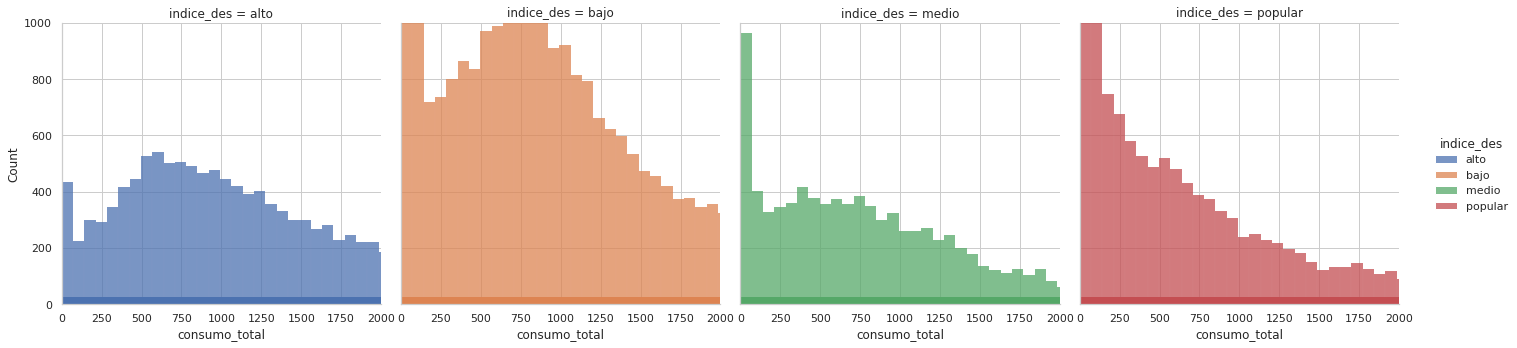

In [166]:
g = sns.displot(data=agua,x='consumo_total',hue='indice_des',col='indice_des', rug=True)
#g.set_titles(indice_des)
plt.ylim(0,1000)
plt.xlim(0,2000)

(0.0, 2000.0)

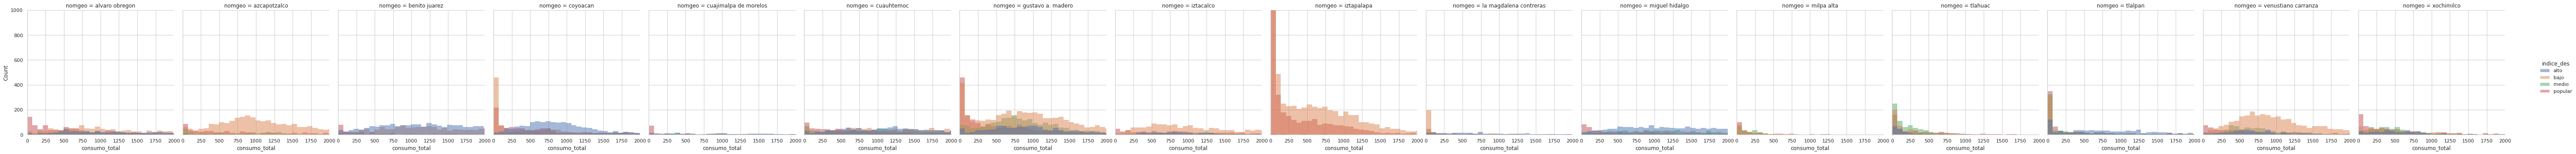

In [137]:
sns.displot(data=agua,x='consumo_total',hue='indice_des',col='nomgeo')
plt.ylim(0,1000)
plt.xlim(0,2000)

In [56]:
consumo_total_sinceros = agua.loc[agua["consumo_total"] > 2]
consumo_total_sinceros = agua.loc[agua["consumo_total"] < 900]

(0.0, 20000.0)

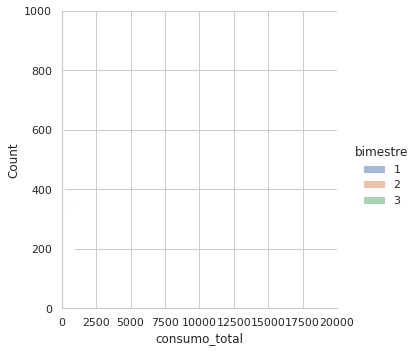

In [121]:
sns.displot(consumo_total_sinceros, x="consumo_total", hue='bimestre')
plt.ylim(0,1000)
plt.xlim(0,20000)

In [58]:
agua['consumo_total'].max()

119726.94

In [59]:
agua['consumo_total'].min()

0.0

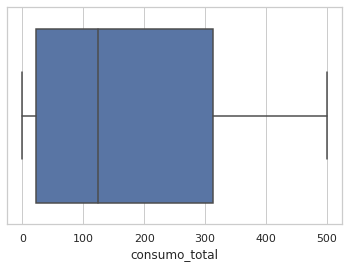

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_total"] < 500]["consumo_total"])

In [61]:
#sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

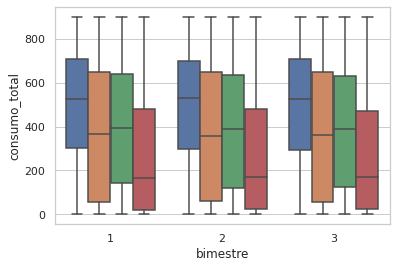

In [149]:
ax = sns.boxplot(x="bimestre", y="consumo_total",hue="indice_des", data = consumo_total_sinceros, orient='v')
ax.legend_.remove()
#plt.legend(loc='upper left')
#g.legend.remove()

### Consumo_prom_dom

(0.0, 2000.0)

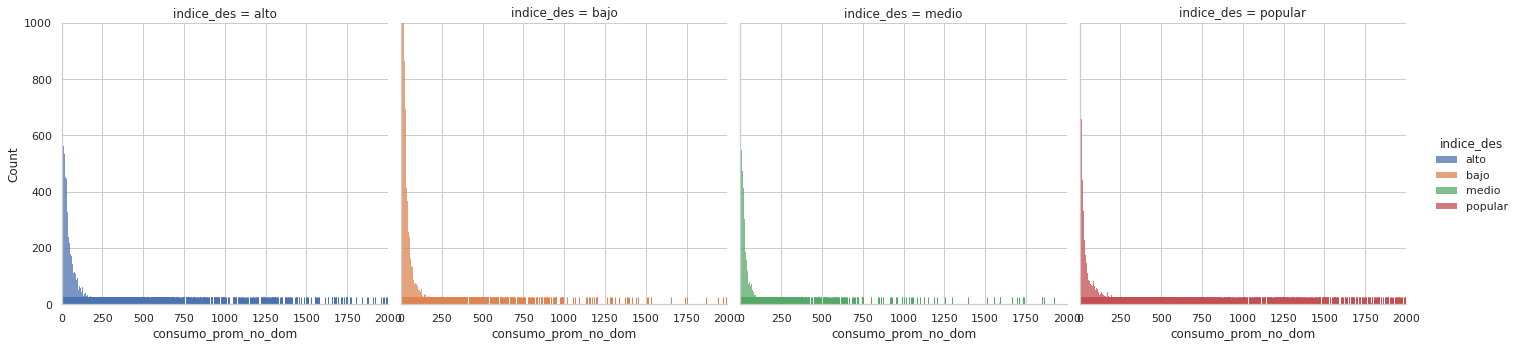

In [63]:
sns.displot(data=agua,x='consumo_prom_no_dom',hue='indice_des',col='indice_des', rug=True)
plt.ylim(0,1000)
plt.xlim(0,2000)

(0.0, 750.0)

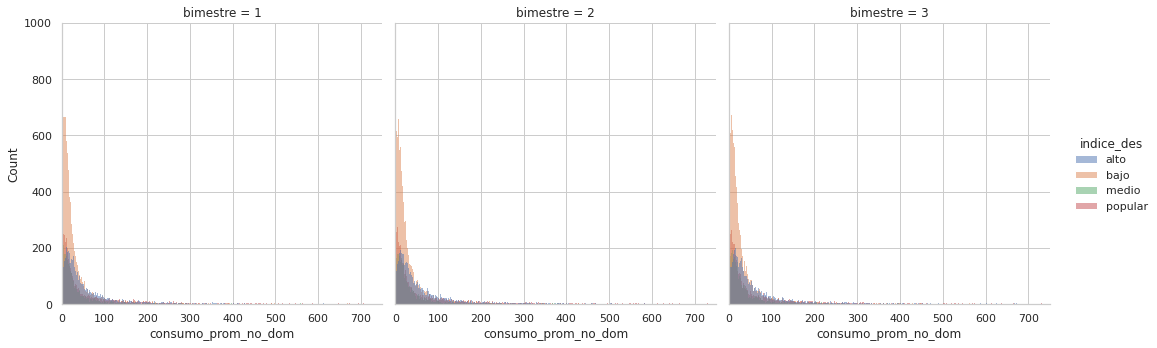

In [119]:
sns.displot(data=agua,x='consumo_prom_no_dom',hue='indice_des',col='bimestre')
plt.ylim(0,1000)
plt.xlim(0,750)

In [130]:
consumo_prom_no_dom_sinceros = agua.loc[agua["consumo_prom_no_dom"] > 2]
consumo_prom_no_dom_sinceros = agua.loc[agua["consumo_prom_no_dom"] < 400]

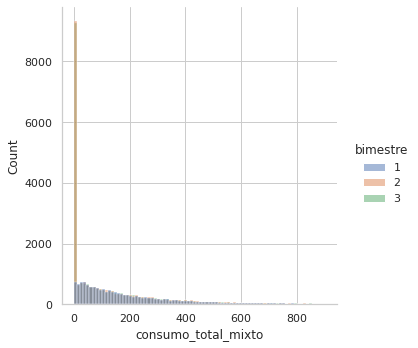

In [131]:
sns.displot(consumo_total_mixto_sinceros, x="consumo_total_mixto", hue='bimestre')

In [132]:
agua['consumo_prom_no_dom'].max()

89691.7734375

In [133]:
agua['consumo_prom_no_dom'].min()

0.0

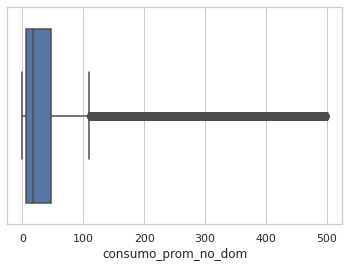

In [134]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_prom_no_dom"] < 500]["consumo_prom_no_dom"])

In [135]:
#sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

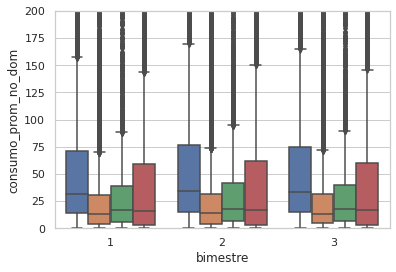

In [152]:
ax = sns.boxplot(x="bimestre", y="consumo_prom_no_dom",hue="indice_des", data = consumo_prom_no_dom_sinceros, orient='v')
plt.ylim(0,200)
ax.legend_.remove()

### consumo_total_dom

(0.0, 2000.0)

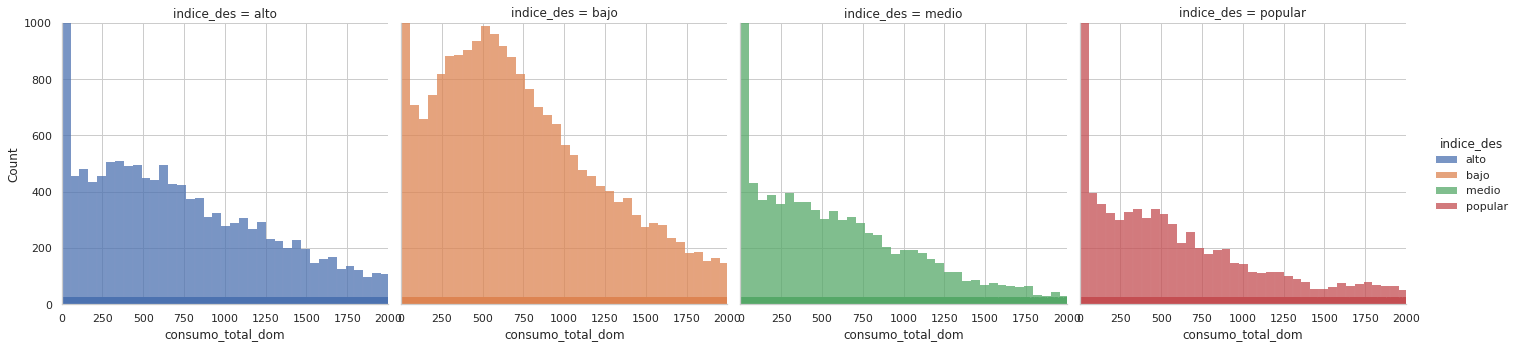

In [72]:
sns.displot(data=agua,x='consumo_total_dom',hue='indice_des',col='indice_des', rug=True)
plt.ylim(0,1000)
plt.xlim(0,2000)

(0.0, 2000.0)

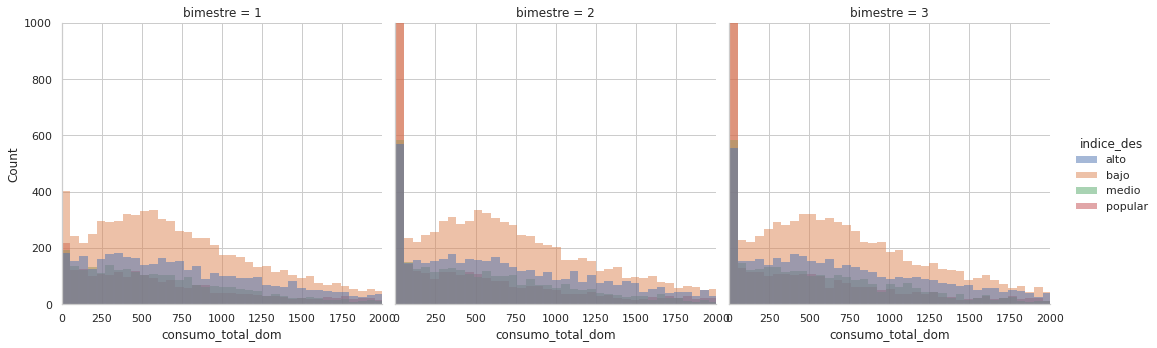

In [73]:
sns.displot(data=agua,x='consumo_total_dom',hue='indice_des',col='bimestre')
plt.ylim(0,1000)
plt.xlim(0,2000)

In [74]:
consumo_total_dom_sinceros = agua.loc[agua["consumo_total_dom"] > 2]
consumo_total_dom_sinceros = agua.loc[agua["consumo_total_dom"] < 900]

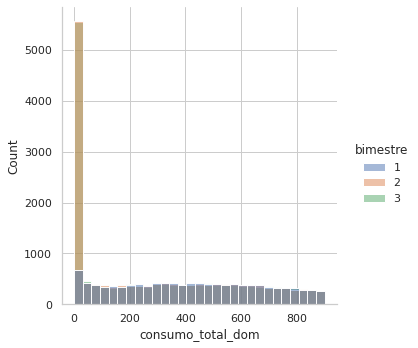

In [75]:
sns.displot(consumo_total_dom_sinceros, x="consumo_total_dom", hue='bimestre')

In [76]:
agua['consumo_total_dom'].max()

95060.69

In [77]:
agua['consumo_total_dom'].min()

0.0

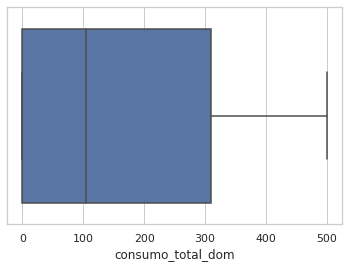

In [78]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_total_dom"] < 500]["consumo_total_dom"])

In [79]:
#sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

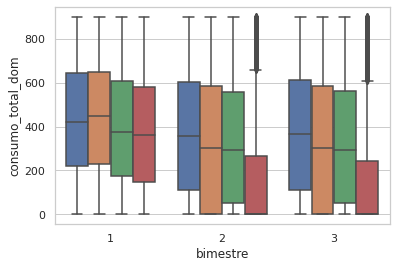

In [153]:
ax = sns.boxplot(x="bimestre", y="consumo_total_dom",hue="indice_des", data = consumo_total_dom_sinceros, orient='v')
ax.legend_.remove()

### Consumo_prom_mixto

(0.0, 2000.0)

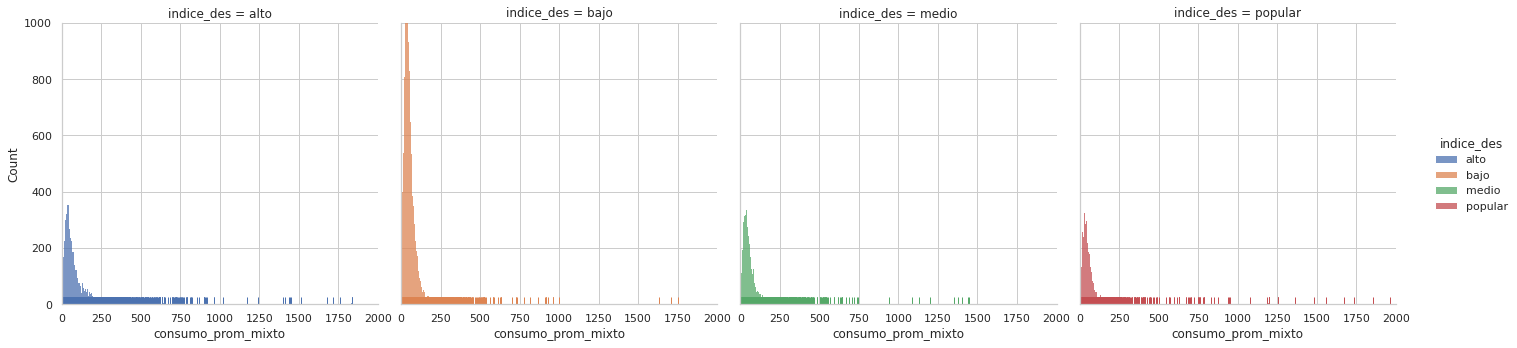

In [81]:
sns.displot(data=agua,x='consumo_prom_mixto',hue='indice_des',col='indice_des', rug=True)
plt.ylim(0,1000)
plt.xlim(0,2000)

(0.0, 400.0)

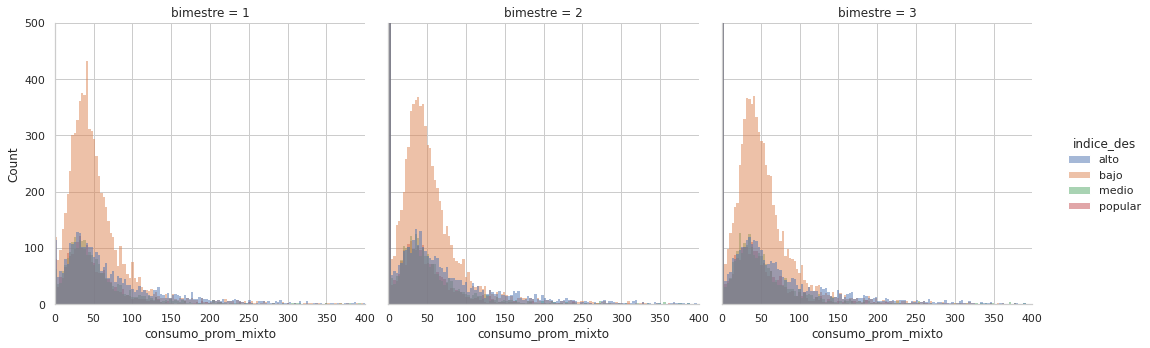

In [118]:
sns.displot(data=agua,x='consumo_prom_mixto',hue='indice_des',col='bimestre')
plt.ylim(0,500)
plt.xlim(0,400)

In [83]:
consumo_prom_mixto_sinceros = agua.loc[agua["consumo_prom_mixto"] > 2]
consumo_prom_mixto_sinceros = agua.loc[agua["consumo_prom_mixto"] < 900]

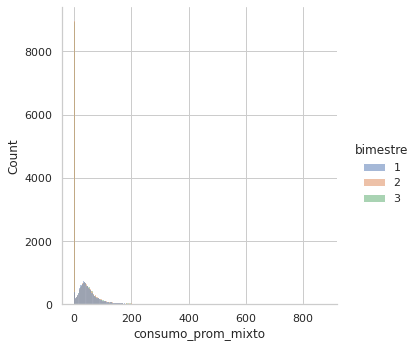

In [84]:
sns.displot(consumo_prom_mixto_sinceros, x="consumo_prom_mixto", hue='bimestre')

In [85]:
agua['consumo_prom_mixto'].max()

11702.22

In [86]:
agua['consumo_prom_mixto'].min()

0.0

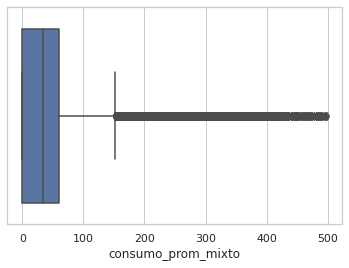

In [87]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_prom_mixto"] < 500]["consumo_prom_mixto"])

In [88]:
#sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

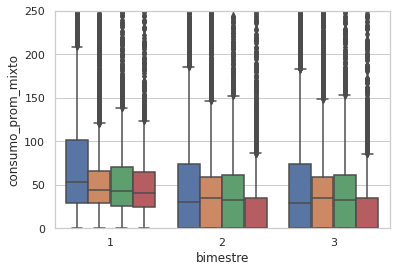

In [155]:
ax = sns.boxplot(x="bimestre", y="consumo_prom_mixto",hue="indice_des", data = consumo_prom_mixto_sinceros, orient='v')
plt.ylim(0,250)
ax.legend_.remove()

### consumo_prom

(0.0, 2000.0)

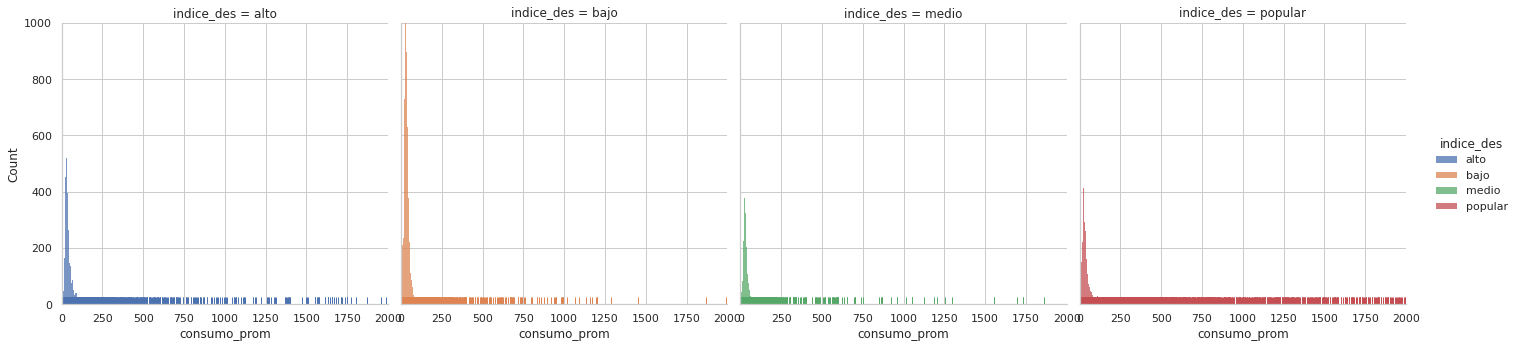

In [90]:
sns.displot(data=agua,x='consumo_prom',hue='indice_des',col='indice_des', rug=True)
plt.ylim(0,1000)
plt.xlim(0,2000)

(0.0, 2000.0)

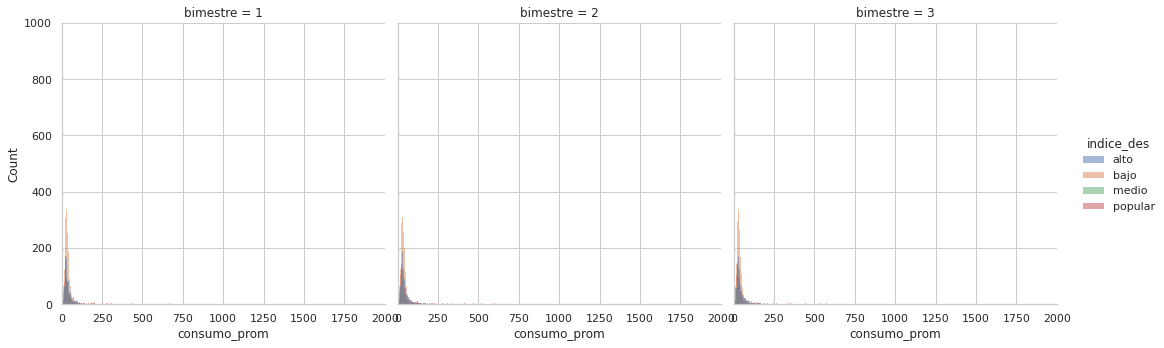

In [91]:
sns.displot(data=agua,x='consumo_prom',hue='indice_des',col='bimestre')
plt.ylim(0,1000)
plt.xlim(0,2000)

In [92]:
consumo_prom_sinceros = agua.loc[agua["consumo_prom"] > 2]
consumo_prom_sinceros = agua.loc[agua["consumo_prom"] < 900]

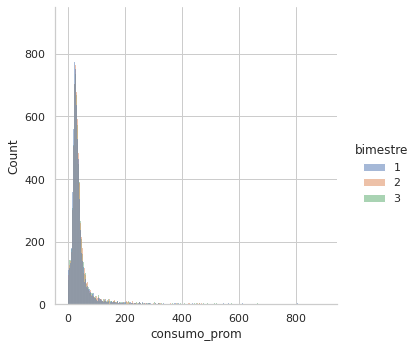

In [93]:
sns.displot(consumo_prom_sinceros, x="consumo_prom", hue='bimestre')

In [94]:
agua['consumo_prom'].max()

89691.7734375

In [95]:
agua['consumo_prom'].min()

0.0

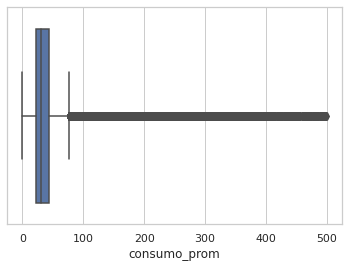

In [96]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_prom"] < 500]["consumo_prom"])

In [97]:
#sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

Text(0.5, 1.0, 'holis')

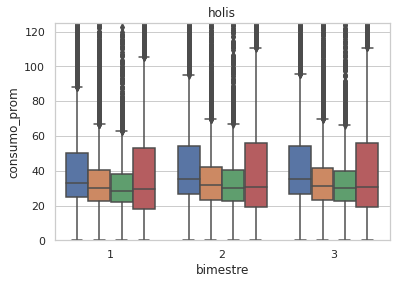

In [158]:
ax = sns.boxplot(x="bimestre", y="consumo_prom",hue="indice_des", data = consumo_prom_sinceros, orient='v')
plt.ylim(0,125)
ax.legend_.remove()
ax.set_title('holis')

### consumo_prom_no_dom

(0.0, 2000.0)

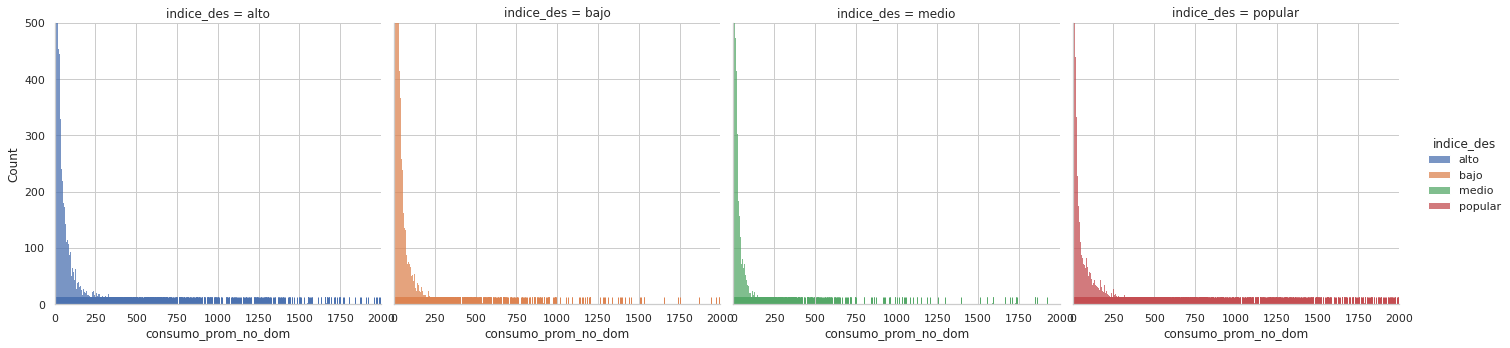

In [99]:
sns.displot(data=agua,x='consumo_prom_no_dom',hue='indice_des',col='indice_des', rug=True)
plt.ylim(0,500)
plt.xlim(0,2000)

(0.0, 2000.0)

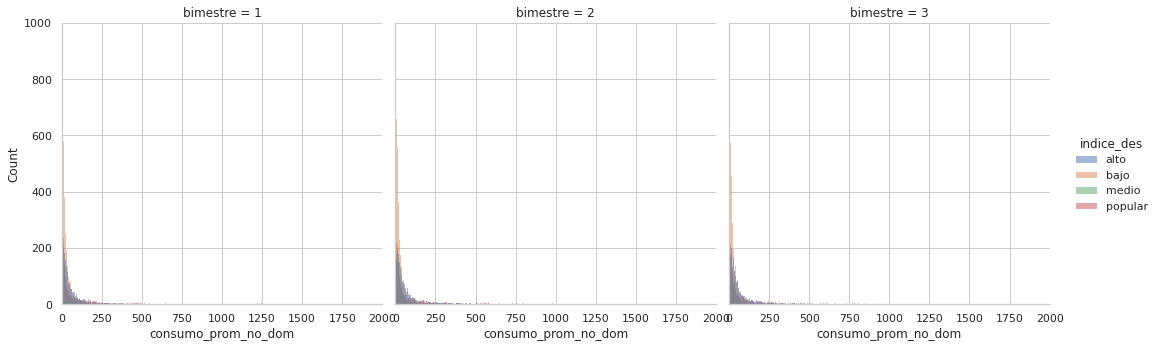

In [100]:
sns.displot(data=agua,x='consumo_prom_no_dom',hue='indice_des',col='bimestre')
plt.ylim(0,1000)
plt.xlim(0,2000)

In [101]:
consumo_prom_no_dom_sinceros = agua.loc[agua["consumo_prom_no_dom"] > 2]
consumo_prom_no_dom_sinceros = agua.loc[agua["consumo_prom_no_dom"] < 900]

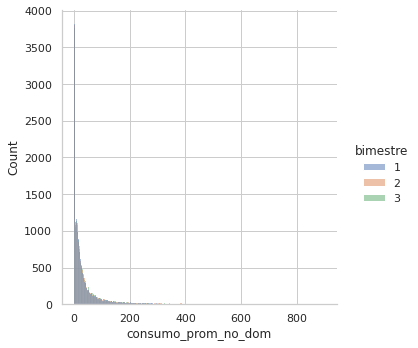

In [102]:
sns.displot(consumo_prom_no_dom_sinceros, x="consumo_prom_no_dom", hue='bimestre')

In [103]:
agua['consumo_prom_no_dom'].max()

89691.7734375

In [104]:
agua['consumo_prom_no_dom'].min()

0.0

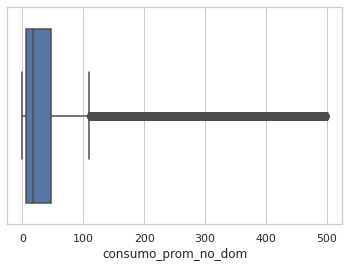

In [105]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_prom_no_dom"] < 500]["consumo_prom_no_dom"])

In [106]:
#sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

<AxesSubplot:xlabel='bimestre', ylabel='consumo_prom_no_dom'>

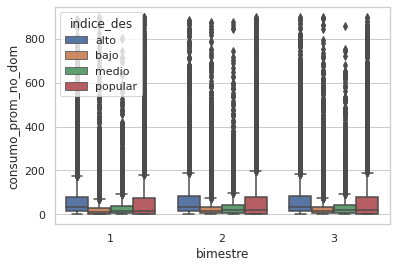

In [107]:
sns.boxplot(x="bimestre", y="consumo_prom_no_dom",hue="indice_des", data = consumo_prom_no_dom_sinceros, orient='v')

### consumo_total_no_dom

(0.0, 2000.0)

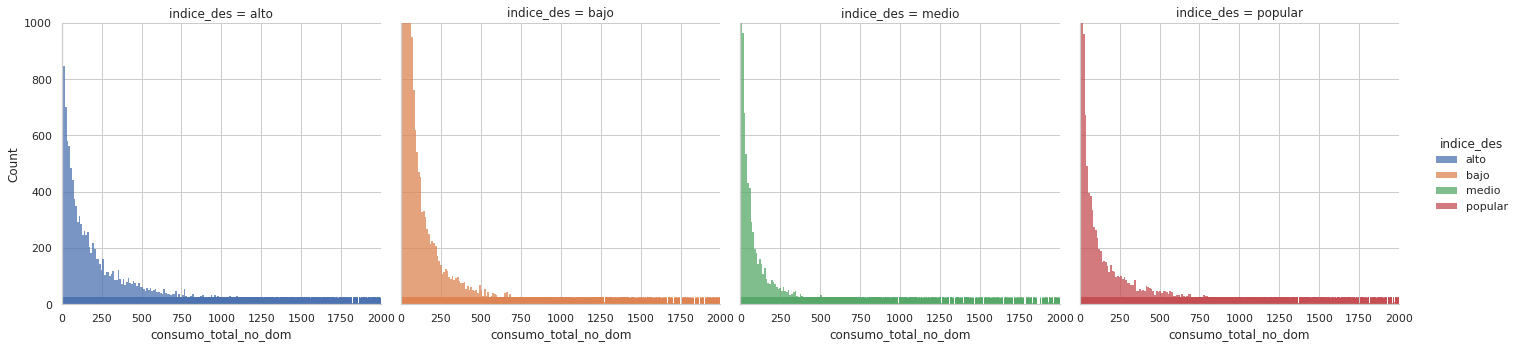

In [108]:
sns.displot(data=agua,x='consumo_total_no_dom',hue='indice_des',col='indice_des', rug=True)
plt.ylim(0,1000)
plt.xlim(0,2000)

(0.0, 2000.0)

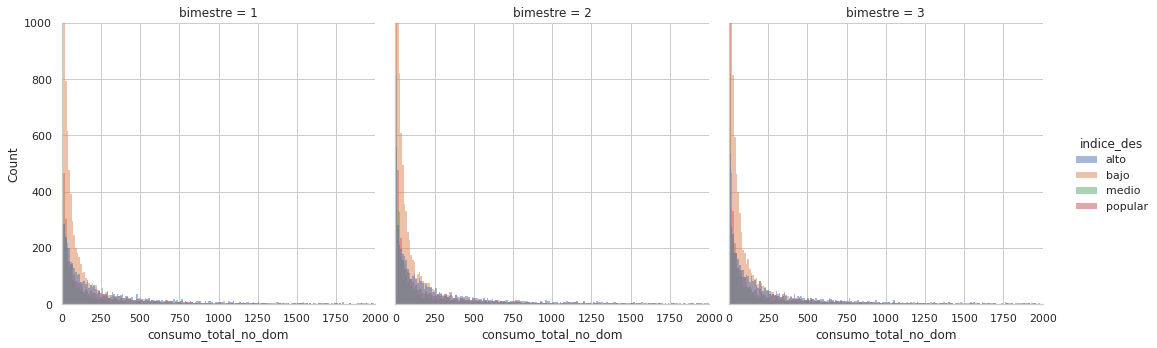

In [109]:
sns.displot(data=agua,x='consumo_total_no_dom',hue='indice_des',col='bimestre')
plt.ylim(0,1000)
plt.xlim(0,2000)

In [110]:
consumo_total_no_dom_sinceros = agua.loc[agua["consumo_total_no_dom"] > 2]
consumo_total_no_dom_sinceros = agua.loc[agua["consumo_total_no_dom"] < 900]

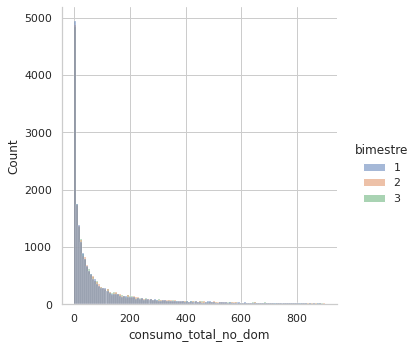

In [111]:
sns.displot(consumo_total_no_dom_sinceros, x="consumo_total_no_dom", hue='bimestre')

In [112]:
agua['consumo_total_no_dom'].max()

119726.94

In [113]:
agua['consumo_total_no_dom'].min()

0.0

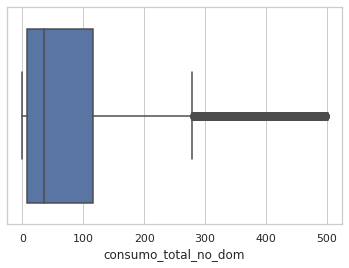

In [114]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_total_no_dom"] < 500]["consumo_total_no_dom"])

In [115]:
#sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

<AxesSubplot:xlabel='bimestre', ylabel='consumo_total_no_dom'>

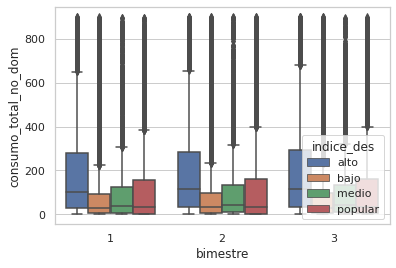

In [116]:
sns.boxplot(x="bimestre", y="consumo_total_no_dom",hue="indice_des", data = consumo_total_no_dom_sinceros, orient='v')

In [117]:
agua.head()

geo_point  \
0  19.4552601937,-99.1126617526   
1  19.4552601937,-99.1126617526   
2  19.4557195871,-99.1135822797   
3  19.4596467168,-99.1044693641   
4  19.4741606185,-99.1467497317   

                                           geo_shape  consumo_total_mixto  \
0  {"type": "multipolygon", "coordinates": [[[[-9...               159.72   
1  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
2  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
3  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
4  {"type": "multipolygon", "coordinates": [[[[-9...                56.72   

              nomgeo  consumo_prom_dom  consumo_total_dom           alcaldia  \
0  gustavo a. madero         42.566364             468.23  gustavo a. madero   
1  gustavo a. madero         35.936667             107.81  gustavo a. madero   
2  gustavo a. madero         24.586000             122.93  gustavo a. madero   
3  gustavo a. madero          0.000000               0.00  gustavo a. madero   
4       azcapotzalco         67.436250             539.49       azcapotzalco   

              colonia  consumo_prom_mixto  consumo_total  consumo_prom  \
0      7 de noviembre               53.24         631.00     42.066667   
1      7 de noviembre                0.00         115.13     28.782500   
2      7 de noviembre                0.00         197.96     32.993333   
3  nueva tenochtitlan                0.00         253.53     84.510000   
4            prohogar               56.72         839.35     76.304545   

   consumo_prom_no_dom bimestre  consumo_total_no_dom    gid indice_des  \
0                 3.05        3                  3.05  57250       alto   
1                 7.32        3                  7.32  57253      medio   
2                75.03        3                 75.03  57255    popular   
3                84.51        3                253.53  57267       bajo   
4               121.57        3                243.14  57330       bajo   

     latitud   longitud  
0  19.455260 -99.112662  
1  19.455260 -99.112662  
2  19.455720 -99.113582  
3  19.459647 -99.104469  
4  19.474161 -99.146750

* tenemos dos alcaldías que presentan una cantidad muy grande de ceros iztapalapa y tlalpan
* la cantidad de ceros se ha mantenido constante a lo largo de los bimestres

---------------------------



* Piensa en que queremos identificar errores en la transferencia de datos.
* Datos faltantes.
* Normalidad/anormalidad en los datos.
* Con qué datos contamos.
* Identificar qué variables vamos a ocupar para un posible modelo de predicción de indice_des (supervisado, clasificación).
* Define preguntas que quieres responder o que guiarán tu análisis exploratorio de los datos.

# ¿Errores en la transferencia de datos?

* existen lugares que tienen diferencias en tipo de consumo (mixto-dom-no_dom)
* 

# Datos faltantes

respondido en el eda / agregar grafica en mi cabeza

# Normalidad/anormalidad en los datos.

* tenemos dos alcaldías que presentan una cantidad muy grande de ceros iztapalapa y tlalpan
* la cantidad de ceros se ha mantenido constante a lo largo de los bimestres

Conclusión:
* Las alcaldías con mayor cantidad de ceros son Iztapalapa, seguida de Tlalpan.
* No existe una colonia o conjunto de colonias que sean afectadas por las cantidades de los ceros, lo que se puede afirmar es que todas ellas son afectadas por este "suceso" de manera uniforme, en particular las que corresponden a las alcaldías de Iztapalapa y Tlalpan.
* A lo largo del tiempo, las distintas alcaldías han tenido el mismo comportamiento.
* Los principales índices de desarrollo afectados por este "suceso" son popular, seguido del bajo.

-------------
agregar gráficas de lalo


# Con qué datos contamos.

eda

# Identificar qué variables vamos a ocupar para un posible modelo de predicción de indice_des (supervisado, clasificación).

In [138]:
list(agua.columns)

['geo_point',
 'geo_shape',
 'consumo_total_mixto',
 'nomgeo',
 'consumo_prom_dom',
 'consumo_total_dom',
 'alcaldia',
 'colonia',
 'consumo_prom_mixto',
 'consumo_total',
 'consumo_prom',
 'consumo_prom_no_dom',
 'bimestre',
 'consumo_total_no_dom',
 'gid',
 'indice_des',
 'latitud',
 'longitud']

### no usar:
* indice_des --> por que es lo que queremos predecir
* bimestre --> "confirmar con cliente"
* anio
* nomgeo
* gid
* colonia --> aumentaría dimensionalidad
* consumo_prom_dom
* consumo_prom_mixto
* consumo_prom_no_dom

### usar:
* latitud?
* longitud?
* alcaldia  
probar el modelo con alcaldia vs lat-long
------------
* consumo_total_mixto
* consumo_total_dom
* consumo_total
* consumo_total_no_dom
* consumo_prom

# Define preguntas que quieres responder o que guiarán tu análisis exploratorio de los datos.

duda seria... **¿para qué quiere el cliente esta clasificación?**


* ¿Cómo se mide el consumo de agua en México?
* distinción entre domestico- no domestico o mixto
* está ligado también al índice de desarrollo
* será representativo tomar alcaldías o coordenadas?
* ¿Cómo están distribuidos los ceros?
* Existe algún cambio entre bimestres?
* Hablar de la dispersión de los datos
* ¿Cómo están los NA's?
* ¿por qué usaríamos las variables que estamos diciendo que vamos a usar?


In [167]:
agua.head()

geo_point  \
0  19.4552601937,-99.1126617526   
1  19.4552601937,-99.1126617526   
2  19.4557195871,-99.1135822797   
3  19.4596467168,-99.1044693641   
4  19.4741606185,-99.1467497317   

                                           geo_shape  consumo_total_mixto  \
0  {"type": "multipolygon", "coordinates": [[[[-9...               159.72   
1  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
2  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
3  {"type": "multipolygon", "coordinates": [[[[-9...                 0.00   
4  {"type": "multipolygon", "coordinates": [[[[-9...                56.72   

              nomgeo  consumo_prom_dom  consumo_total_dom           alcaldia  \
0  gustavo a. madero         42.566364             468.23  gustavo a. madero   
1  gustavo a. madero         35.936667             107.81  gustavo a. madero   
2  gustavo a. madero         24.586000             122.93  gustavo a. madero   
3  gustavo a. madero          0.000000               0.00  gustavo a. madero   
4       azcapotzalco         67.436250             539.49       azcapotzalco   

              colonia  consumo_prom_mixto  consumo_total  consumo_prom  \
0      7 de noviembre               53.24         631.00     42.066667   
1      7 de noviembre                0.00         115.13     28.782500   
2      7 de noviembre                0.00         197.96     32.993333   
3  nueva tenochtitlan                0.00         253.53     84.510000   
4            prohogar               56.72         839.35     76.304545   

   consumo_prom_no_dom bimestre  consumo_total_no_dom    gid indice_des  \
0                 3.05        3                  3.05  57250       alto   
1                 7.32        3                  7.32  57253      medio   
2                75.03        3                 75.03  57255    popular   
3                84.51        3                253.53  57267       bajo   
4               121.57        3                243.14  57330       bajo   

     latitud   longitud  
0  19.455260 -99.112662  
1  19.455260 -99.112662  
2  19.455720 -99.113582  
3  19.459647 -99.104469  
4  19.474161 -99.146750

In [173]:
agua2 = agua.copy()

In [174]:
agua2.columns

Index(['geo_point', 'geo_shape', 'consumo_total_mixto', 'nomgeo',
       'consumo_prom_dom', 'consumo_total_dom', 'alcaldia', 'colonia',
       'consumo_prom_mixto', 'consumo_total', 'consumo_prom',
       'consumo_prom_no_dom', 'bimestre', 'consumo_total_no_dom', 'gid',
       'indice_des', 'latitud', 'longitud'],
      dtype='object')

In [175]:
agua2.drop(columns =['geo_point', 'geo_shape', 'nomgeo',
       'consumo_prom_dom', 'alcaldia', 'colonia',
       'consumo_prom_mixto','consumo_prom_no_dom', 'bimestre', 'gid'], inplace = True) 

In [176]:
agua2.head()

consumo_total_mixto  consumo_total_dom  consumo_total  consumo_prom  \
0               159.72             468.23         631.00     42.066667   
1                 0.00             107.81         115.13     28.782500   
2                 0.00             122.93         197.96     32.993333   
3                 0.00               0.00         253.53     84.510000   
4                56.72             539.49         839.35     76.304545   

   consumo_total_no_dom indice_des    latitud   longitud  
0                  3.05       alto  19.455260 -99.112662  
1                  7.32      medio  19.455260 -99.112662  
2                 75.03    popular  19.455720 -99.113582  
3                253.53       bajo  19.459647 -99.104469  
4                243.14       bajo  19.474161 -99.146750

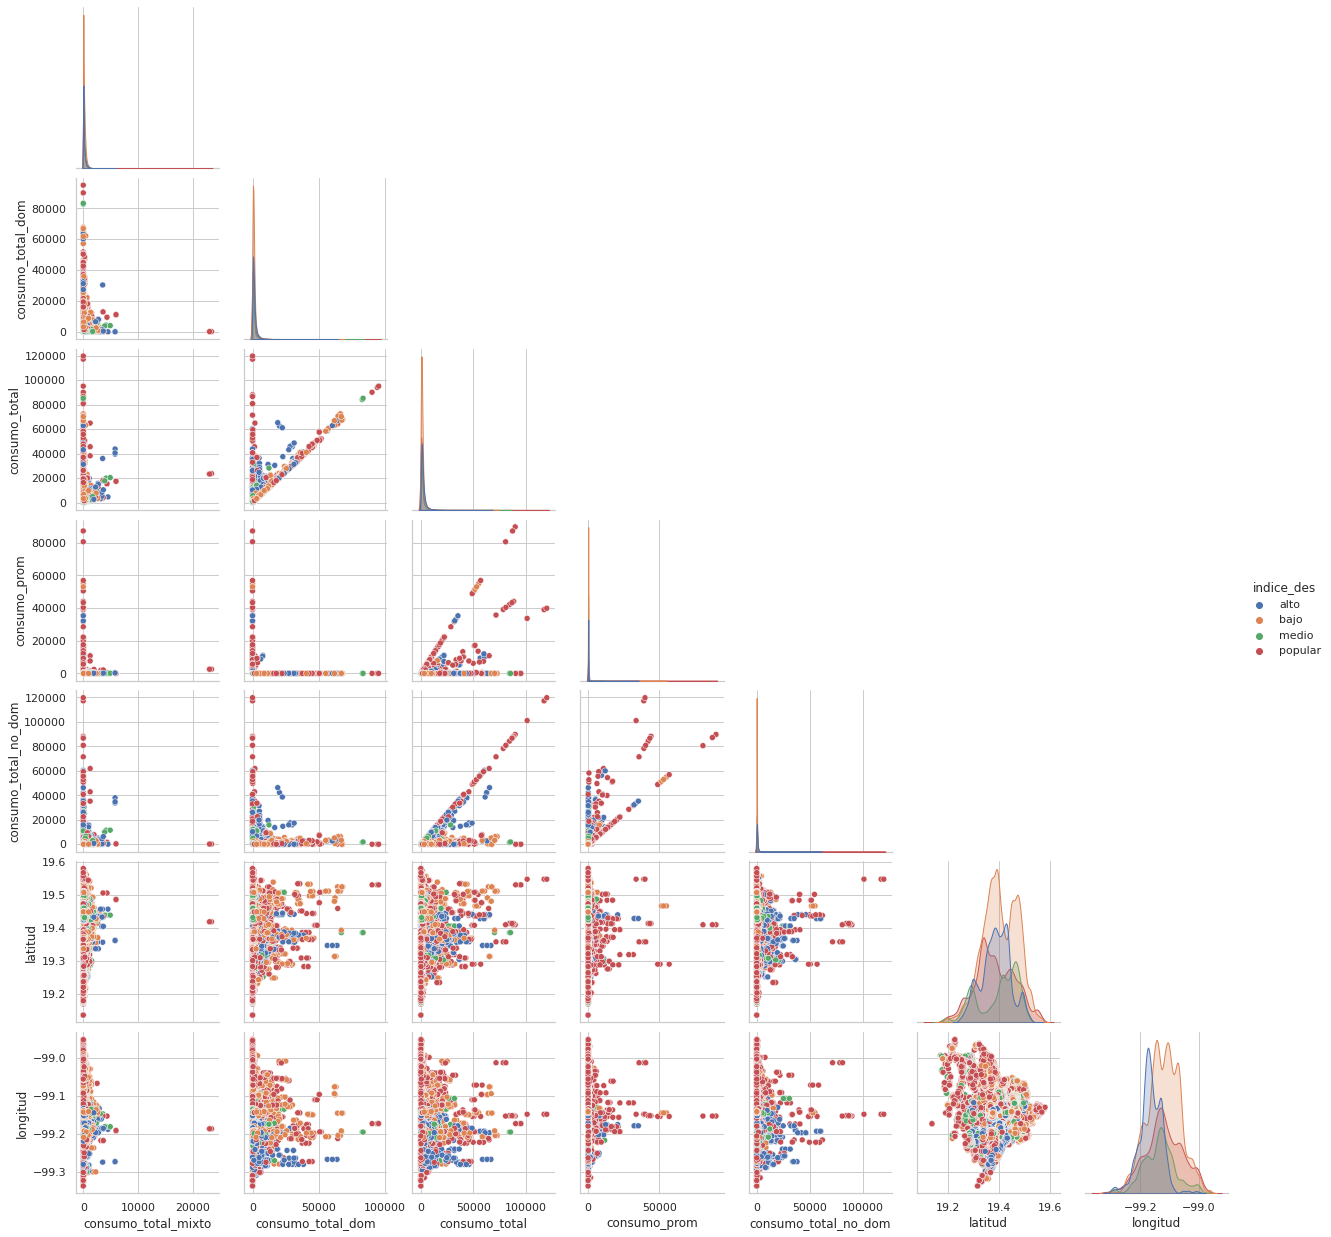

In [181]:
sns.pairplot(agua2, hue='indice_des',corner=True)

In [178]:
# consumo_total_mixto
consumo_total_mixto_sinceros2 = agua2.loc[agua2["consumo_total_mixto"] > 4]
consumo_total_mixto_sinceros2 = agua2.loc[agua2["consumo_total_mixto"] < 900]

# consumo_total_dom
consumo_total_dom_sinceros2 = agua2.loc[agua2["consumo_total_dom"] > 2]
consumo_total_dom_sinceros2 = agua2.loc[agua2["consumo_total_dom"] < 900]

# consumo_total
consumo_total_sinceros2 = agua2.loc[agua2["consumo_total"] > 2]
consumo_total_sinceros2 = agua2.loc[agua2["consumo_total"] < 900]

# consumo_total_no_dom
consumo_total_no_dom_sinceros2 = agua2.loc[agua2["consumo_total_no_dom"] > 2]
consumo_total_no_dom_sinceros2 = agua2.loc[agua2["consumo_total_no_dom"] < 900]

# consumo_prom
consumo_prom_sinceros2 = agua2.loc[agua2["consumo_prom"] > 2]
consumo_prom_sinceros2 = agua2.loc[agua2["consumo_prom"] < 900]


# consumo_prom_no_dom_sinceros2 = agua2.loc[agua2["consumo_prom_no_dom"] > 2]
# consumo_prom_no_dom_sinceros2 = agua2.loc[agua2["consumo_prom_no_dom"] < 400]


# consumo_prom_mixto_sinceros = agua.loc[agua["consumo_prom_mixto"] > 2]
# consumo_prom_mixto_sinceros = agua.loc[agua["consumo_prom_mixto"] < 900]

# consumo_prom_sinceros = agua.loc[agua["consumo_prom"] > 2]
# consumo_prom_sinceros = agua.loc[agua["consumo_prom"] < 900]

# consumo_prom_no_dom_sinceros = agua.loc[agua["consumo_prom_no_dom"] > 2]
# consumo_prom_no_dom_sinceros = agua.loc[agua["consumo_prom_no_dom"] < 900]

In [ ]:
agua_no_popular2 = agua2.loc[agua2["indice_des"] != 'popular']
agua_no_popular_ni_media = agua_no_popular.loc[agua_no_popular["indice_des"] != 'medio']
agua_no_popular_ni_bajo = agua_no_popular.loc[agua_no_popular["indice_des"] != 'bajo']

In [179]:
agua2_popular2 = agua2.loc[agua2["indice_des"] == 'popular']
agua2_alto2 = agua2.loc[agua2["indice_des"] == 'alto']
agua2_medio2 = agua2.loc[agua2["indice_des"] == 'medio']
agua2_bajo2 = agua2.loc[agua2["indice_des"] == 'bajo']


scatterplots

In [186]:
#sns.scatterplot(data=agua2,x = 'consumo_total_mixto', y = 'latitud', hue = 'indice_des', col = 'indice_des')

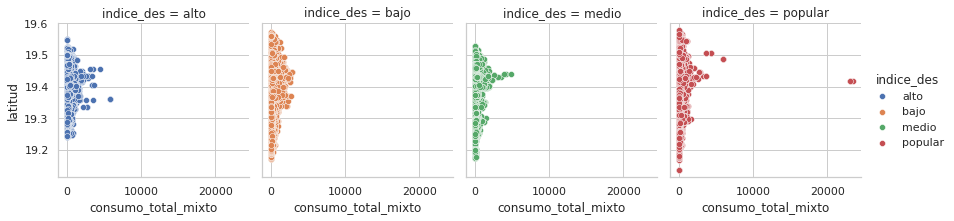

In [185]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total_mixto", y="latitud")
g.set_axis_labels("consumo_total_mixto", "latitud")
g.add_legend()

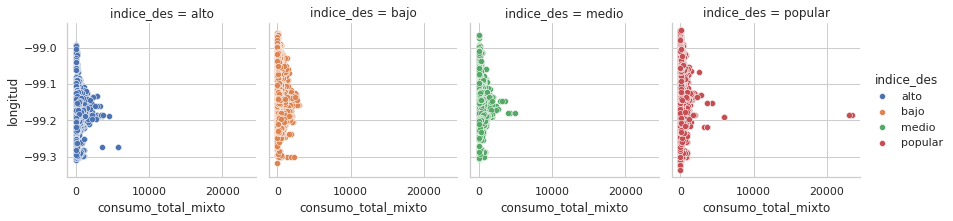

In [187]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total_mixto", y="longitud")
g.set_axis_labels("consumo_total_mixto", "longitud")
g.add_legend()

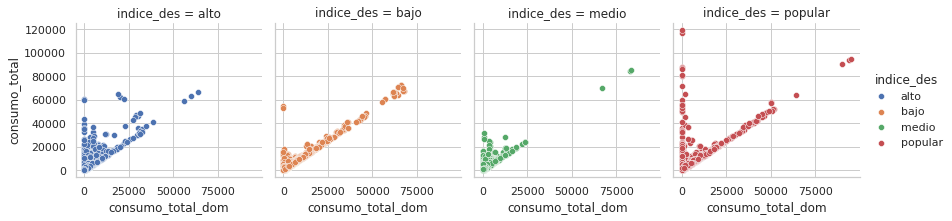

In [189]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total_dom", y="consumo_total")
g.set_axis_labels("consumo_total_dom", "consumo_total")
g.add_legend()

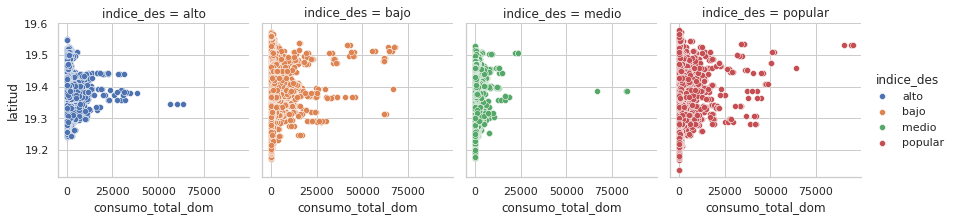

In [190]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total_dom", y="latitud")
g.set_axis_labels("consumo_total_dom", "latitud")
g.add_legend()

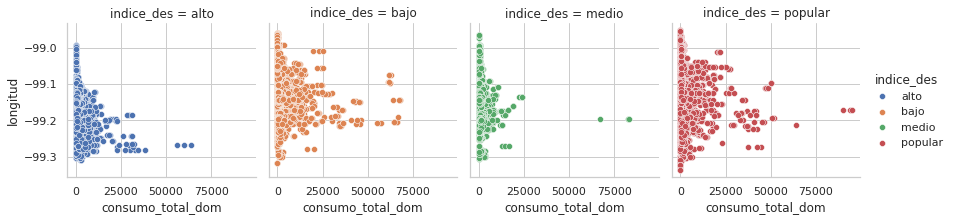

In [191]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total_dom", y="longitud")
g.set_axis_labels("consumo_total_dom", "longitud")
g.add_legend()

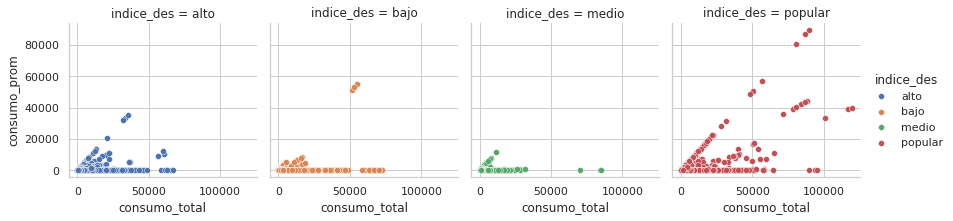

In [192]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total", y="consumo_prom")
g.set_axis_labels("consumo_total", "consumo_prom")
g.add_legend()

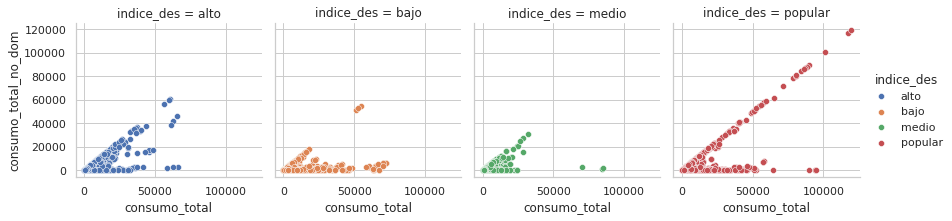

In [193]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total", y="consumo_total_no_dom")
g.set_axis_labels("consumo_total", "consumo_total_no_dom")
g.add_legend()

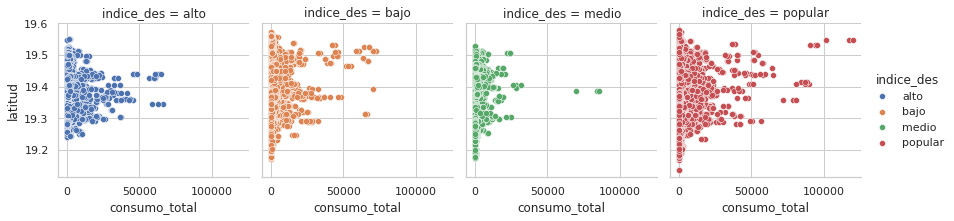

In [194]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total", y="latitud")
g.set_axis_labels("consumo_total", "latitud")
g.add_legend()

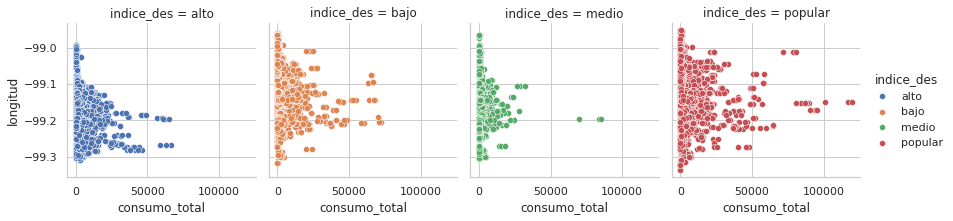

In [195]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_total", y="longitud")
g.set_axis_labels("consumo_total", "longitud")
g.add_legend()

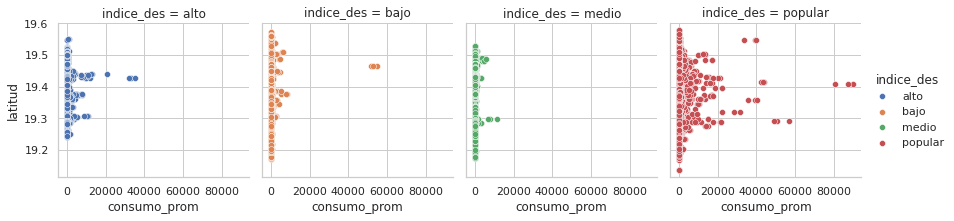

In [196]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_prom", y="latitud")
g.set_axis_labels("consumo_prom", "latitud")
g.add_legend()

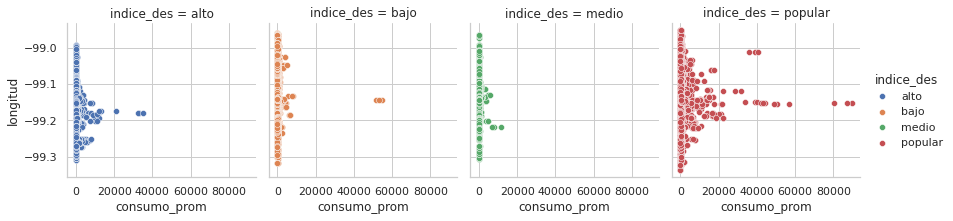

In [197]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="consumo_prom", y="longitud")
g.set_axis_labels("consumo_prom", "longitud")
g.add_legend()

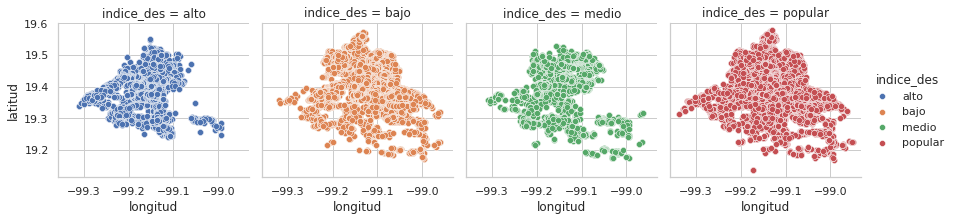

In [198]:
g = sns.FacetGrid(agua2, col="indice_des", hue="indice_des")
g.map_dataframe(sns.scatterplot, x="longitud", y="latitud")
g.set_axis_labels("longitud", "latitud")
g.add_legend()

Combinaciones que explican:   


elemento y         | elemento x                  | indices
-------------------| --------------------------- | -----------
latitud            | consumo_total_mixto         | todos
longitud           | consumo_total_mixto         | todos
consumo_total_dom  | consumo_total               | todos
consumo_total_dom  | latitud                     | todos
consumo_total_dom  | longitud                    | todos
consumo_total      | consumo_prom                | todos
consumo_total      | consumo_total_no_dom        | todos
consumo_total      | latitud                     | todos
consumo_total      | longitud                    | todos
consumo_prom       | latitud                     | todos
consumo_prom       | longitud                    | todos
latitud            | longitud                    | todos